In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df1 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2013-13.csv", encoding='latin1')
df2 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2014.csv", encoding='latin1')
df3 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2015.csv", encoding='latin1')
df4 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2016.csv", encoding='latin1')
df5 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2017.csv", encoding='latin1')
df6 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2018.csv", encoding='latin1')
df7 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2019.csv", encoding='latin1')
df8 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2020.csv", encoding='latin1')
df9 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2021.csv", encoding='latin1')
df10 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2022.csv", encoding='latin1')
df11 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2023,1.csv", encoding='latin1')
df12 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2023,2.csv", encoding='latin1')
df13 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2024,1.csv", encoding='latin1')
df14 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2024,2.csv", encoding='latin1')

C:\Users\VIP\AppData\Local\Temp\ipykernel_5628\2137474169.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2013-13.csv", encoding='latin1')
C:\Users\VIP\AppData\Local\Temp\ipykernel_5628\2137474169.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2014.csv", encoding='latin1')
C:\Users\VIP\AppData\Local\Temp\ipykernel_5628\2137474169.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(r"D:\temp\Car_Insurace_Claim\Cus_trail\CUS_EXPORT_2015.csv", encoding='latin1')
C:\Users\VIP\AppData\Local\Temp\ipykernel_5628\2137474169.py:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv(r"D:\temp\Car_Ins

In [3]:
import pandas as pd

# List of all dataframes
all_dfs = [
    df1, df2, df3, df4, df5, df6, df7,
    df8, df9, df10, df11, df12, df13, df14
]

# Concatenate into a single dataframe
df = pd.concat(all_dfs, axis=0, ignore_index=True)


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.isnull().sum()

pvsnr                         0
vsnr                          0
status                        0
aktiv                         0
akt_kuka                      0
spartek                       0
beginn                        0
datum_s                 2138699
vtr_dau                      78
kund_beg                     10
vtrweg                        0
gesbeitr                     84
SDANZAHL                     69
SCHAGESA                     69
KOSTGESA                     69
KOSTGEKA                     69
kosten_verw                  69
kosten_prov                  69
gfeld                         0
ort                           0
plz                          19
alter                         0
anr                           0
SDBEITR5                     69
HERSTELLER                   62
HSN                       42894
TSN                      189580
ELEKTRO                      35
KILOMETERSTAND_CLEAN    1023998
ZW                            0
WKZ                     2098370
KH_SF   

In [6]:
columns_to_drop = [
    'WKZ', 'KH_SF', 'ERSZ_aktiv','datum_s',
    'ZW_storn', 'WKZ_storn', 'KH_SF_storn', 'ERSZ_storn','pvsnr'
]

df = df.drop(columns=columns_to_drop)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4201331 entries, 0 to 4201330
Data columns (total 30 columns):
 #   Column                Dtype  
---  ------                -----  
 0   vsnr                  object 
 1   status                object 
 2   aktiv                 int64  
 3   akt_kuka              int64  
 4   spartek               object 
 5   beginn                object 
 6   vtr_dau               float64
 7   kund_beg              object 
 8   vtrweg                object 
 9   gesbeitr              float64
 10  SDANZAHL              float64
 11  SCHAGESA              float64
 12  KOSTGESA              float64
 13  KOSTGEKA              float64
 14  kosten_verw           float64
 15  kosten_prov           float64
 16  gfeld                 object 
 17  ort                   object 
 18  plz                   object 
 19  alter                 int64  
 20  anr                   object 
 21  SDBEITR5              float64
 22  HERSTELLER            object 
 23  HSN    

In [8]:
#Factorizing the data from catagorical to numerical
df['beginn'] = pd.to_datetime(df['beginn'], format='%d.%m.%Y')
df['beg_year'] = df['beginn'].dt.year
df['beg_month'] = df['beginn'].dt.month
df['beg_day'] = df['beginn'].dt.day
# Extracting Weekday from date
df['weekday'] = df['beginn'].dt.day_name()
df['Quarter'] = pd.to_datetime(df['beg_month'], format='%m').dt.quarter

In [9]:
#Factorizing the data from catagorical to numerical
df['Weekday_id'] = pd.factorize(df['weekday'])[0]+1
df.replace({'V':1, 'M':2, 'S':3, 'D':4},inplace=True)

C:\Users\VIP\AppData\Local\Temp\ipykernel_5628\2291113106.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'V':1, 'M':2, 'S':3, 'D':4},inplace=True)


In [10]:
#Factorizing the data from catagorical to numerical
df['Cus_type'] = df['gfeld'].str.split('/').str[0]
df['Cus_typ_id'] = pd.factorize(df['Cus_type'])[0]+1
df['ort_id'] = pd.factorize(df['ort'])[0]+1
df[['Sex_id','Sex']]= df['anr'].str.split('/',expand=True)
df['gender_id'] = pd.factorize(df['Sex_id'])[0]+1
df['plz_id'] = pd.factorize(df['plz'])[0]+1
df['Hersteller_id'] = pd.factorize(df['HERSTELLER'])[0]+1
df['spartek'] = pd.factorize(df['spartek'])[0]+1

In [11]:
labels, uniques = pd.factorize(df['plz'])
df['plz_id'] = labels + 1  # If you want to start from 1

# Display the mapping
mapping = {category: code + 1 for code, category in enumerate(uniques)}
print(mapping)


{'24944': 1, '24994': 2, '24885': 3, '24850': 4, '24943': 5, '24890': 6, '23845': 7, '24937': 8, '24405': 9, '24401': 10, '24392': 11, '24107': 12, '23823': 13, '24395': 14, '24860': 15, '24589': 16, '24837': 17, '23701': 18, '24891': 19, '24988': 20, '24991': 21, '24969': 22, '24149': 23, '24975': 24, '24796': 25, '22303': 26, '24894': 27, '24977': 28, '24989': 29, '24972': 30, '24357': 31, '24976': 32, '24966': 33, '24986': 34, '24873': 35, '24376': 36, '24816': 37, '24367': 38, '16727': 39, '24882': 40, '24864': 41, '24881': 42, '24879': 43, '24220': 44, '24960': 45, '24790': 46, '24939': 47, '24407': 48, '24402': 49, '24817': 50, '24855': 51, '23827': 52, '24955': 53, '24980': 54, '24941': 55, '24997': 56, '25578': 57, '14469': 58, '24635': 59, '24983': 60, '24996': 61, '24888': 62, '24409': 63, '24404': 64, '24893': 65, '24808': 66, '24897': 67, '24366': 68, '24360': 69, '24340': 70, '25856': 71, '24214': 72, '24794': 73, '24857': 74, '24361': 75, '24814': 76, '24363': 77, '24358'

In [12]:
# Mapping postal codes to states in Germany
# The mapping is based on the first two digits of the postal code (PLZ)
plz_state_mapping = {
    '01': 'Sachsen',
    '02': 'Sachsen',
    '03': 'Brandenburg',
    '04': 'Sachsen',
    '05': 'Sachsen-Anhalt',
    '06': 'Sachsen-Anhalt',
    '07': 'Thüringen',
    '08': 'Sachsen',
    '09': 'Sachsen',

    '10': 'Berlin', '11': 'Berlin', '12': 'Brandenburg',
    '13': 'Brandenburg', '14': 'Brandenburg', '15': 'Brandenburg',
    '16': 'Brandenburg',

    '17': 'Mecklenburg-Vorpommern', '18': 'Mecklenburg-Vorpommern',
    '19': 'Mecklenburg-Vorpommern',

    '20': 'Schleswig-Holstein', '21': 'Schleswig-Holstein',
    '22': 'Hamburg', '23': 'Schleswig-Holstein',

    '24': 'Schleswig-Holstein', '25': 'Schleswig-Holstein',
    '26': 'Niedersachsen', '27': 'Bremen', '28': 'Bremen',
    '29': 'Niedersachsen',

    '30': 'Niedersachsen', '31': 'Niedersachsen', '32': 'Nordrhein-Westfalen',
    '33': 'Nordrhein-Westfalen', '34': 'Hessen',

    '35': 'Hessen', '36': 'Hessen', '37': 'Niedersachsen',
    '38': 'Niedersachsen', '39': 'Sachsen-Anhalt',

    '40': 'Nordrhein-Westfalen', '41': 'Nordrhein-Westfalen',
    '42': 'Nordrhein-Westfalen', '44': 'Nordrhein-Westfalen',
    '45': 'Nordrhein-Westfalen', '46': 'Nordrhein-Westfalen',

    '47': 'Nordrhein-Westfalen', '48': 'Nordrhein-Westfalen',
    '49': 'Niedersachsen',

    '50': 'Nordrhein-Westfalen', '51': 'Nordrhein-Westfalen',
    '52': 'Nordrhein-Westfalen', '53': 'Nordrhein-Westfalen',
    '54': 'Rheinland-Pfalz', '55': 'Rheinland-Pfalz',

    '56': 'Rheinland-Pfalz', '57': 'Nordrhein-Westfalen',
    '58': 'Nordrhein-Westfalen', '59': 'Nordrhein-Westfalen',

    '60': 'Hessen', '61': 'Hessen', '62': 'Hessen',
    '63': 'Hessen', '64': 'Hessen', '65': 'Hessen',

    '66': 'Saarland', '67': 'Rheinland-Pfalz', '68': 'Rheinland-Pfalz',
    '69': 'Hessen',

    '70': 'Baden-Württemberg', '71': 'Baden-Württemberg',
    '72': 'Baden-Württemberg', '73': 'Baden-Württemberg',
    '74': 'Baden-Württemberg', '75': 'Baden-Württemberg',
    '76': 'Baden-Württemberg', '77': 'Baden-Württemberg',
    '78': 'Baden-Württemberg', '79': 'Baden-Württemberg',

    '80': 'Bayern', '81': 'Bayern', '82': 'Bayern', '83': 'Bayern',
    '84': 'Bayern', '85': 'Bayern', '86': 'Bayern', '87': 'Bayern',
    '88': 'Bayern', '89': 'Bayern',

    '90': 'Bayern', '91': 'Bayern', '92': 'Bayern', '93': 'Bayern',
    '94': 'Bayern', '95': 'Bayern', '96': 'Bayern',

    '97': 'Bayern', '98': 'Thüringen', '99': 'Thüringen'
}

def get_state_from_plz(plz):
    if pd.isnull(plz):
        return None
    try:
        plz_str = str(plz).zfill(5)  # ensure it's 5 digits
        return plz_state_mapping.get(plz_str[:2])
    except:
        return None
    
df['state'] = df['plz'].apply(get_state_from_plz)
df['state_id'] = pd.factorize(df['state'])[0]+1
df = df.dropna(subset=['state'])


In [13]:
#Factorizing the data from catagorical to numerical
df['status_id'] = pd.factorize(df['status'])[0]+1
df['ELEKTRO'] = pd.factorize(df['ELEKTRO'])[0]+1

In [14]:
#Using this technique as factorize make nan values to 0, nan values should be in nan 
codes, uniques = pd.factorize(df['TSN'], sort=True)
df['TSN'] = np.where(df['TSN'].isna(), np.nan, codes + 1)
df['alter'] = df['alter'].replace([998, 999], np.nan)


In [15]:
#Converting the date column to datetime format
df['First_reg'] = pd.to_datetime(df['ersz_final'], format="%d%b%Y")
df['Car_age_indays'] = (pd.Timestamp.today() - df['First_reg']).dt.days
df['carage_years'] = df['Car_age_indays'] / 365.25
df['carage_years'] = df['carage_years'].round(0)
df = df[df['carage_years'] >= 0]


In [16]:
df.head()

,vsnr,status,aktiv,akt_kuka,spartek,beginn,vtr_dau,kund_beg,vtrweg,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND_CLEAN,ZW,claim,ersz_final,beg_year,beg_month,beg_day,weekday,Quarter,Weekday_id,Cus_type,Cus_typ_id,ort_id,Sex_id,Sex,gender_id,plz_id,Hersteller_id,state,state_id,status_id,First_reg,Car_age_indays,carage_years
0,01012223-003,Aktiv,1,1,1,2013-06-16,4306.0,17.09.1969,1,110.00,0.0,0.0,0.0,0.0,70.54,41.38,70270/ Privatkunden,Flensburg,24944,83.0,71296/ Frau,404.26,VOLKSWAGEN-VW,603.0,1367.0,1,104982.0,65697/ jährlich,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5900.0,16.0
1,01012223-003,Aktiv,1,1,2,2013-06-16,4306.0,17.09.1969,1,253.96,0.0,0.0,0.0,0.0,186.81,89.36,70270/ Privatkunden,Flensburg,24944,83.0,71296/ Frau,1076.16,VOLKSWAGEN-VW,603.0,1367.0,1,104982.0,65697/ jährlich,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5900.0,16.0
2,01012748-002,Storno,0,0,1,2013-10-08,3805.0,03.05.1979,1,325.06,0.0,0.0,0.0,0.0,134.57,77.70,70269/ Land- und Forstwirtschaft,Böxlund,24994,NaN,01515/ Erbengemeinschaft,752.15,NISSAN (J),1329.0,1266.0,1,50000.0,*No Format*,0,20JUN2018,2013,10,8,Tuesday,4,2,70269,2,2,01515,Erbengemeinschaft,2,2,2,Schleswig-Holstein,1,2,2018-06-20,2609.0,7.0
3,01012748-002,Storno,0,0,2,2013-10-08,3805.0,03.05.1979,1,186.02,0.0,0.0,0.0,0.0,121.83,58.12,70269/ Land- und Forstwirtschaft,Böxlund,24994,NaN,01515/ Erbengemeinschaft,703.32,NISSAN (J),1329.0,1266.0,1,50000.0,*No Format*,0,20JUN2018,2013,10,8,Tuesday,4,2,70269,2,2,01515,Erbengemeinschaft,2,2,2,Schleswig-Holstein,1,2,2018-06-20,2609.0,7.0
4,01012748-002,Storno,0,0,3,2013-10-08,2927.0,03.05.1979,1,0.00,0.0,0.0,0.0,0.0,19.41,8.72,70269/ Land- und Forstwirtschaft,Böxlund,24994,NaN,01515/ Erbengemeinschaft,104.68,NISSAN (J),1329.0,1266.0,1,50000.0,*No Format*,0,20JUN2018,2013,10,8,Tuesday,4,2,70269,2,2,01515,Erbengemeinschaft,2,2,2,Schleswig-Holstein,1,2,2018-06-20,2609.0,7.0


In [17]:
#vtr_dau gesbeitr KOSTGESA KOSTGEKA kosten_verw kosten_prov  spartek status_id Car_age_indays estimated_total_paid

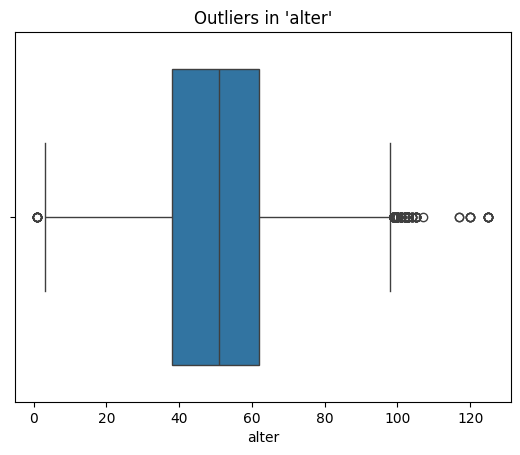

In [18]:
# Creating a boxplot to visualize outliers in the 'alter' column
sns.boxplot(x=df['alter'])
plt.title("Outliers in 'alter'")
plt.show()


In [19]:
df.alter.unique()

array([ 83.,  nan,  74.,  82.,  67.,  62.,  60.,  58.,  96.,  75.,  70.,
        68.,  66.,  73.,  61.,  64.,  59.,  72.,  77.,  63.,  80.,  71.,
        76.,  88.,  65.,  81.,  86.,  84.,  69.,  79.,  89.,  94.,  87.,
        78.,  85.,  92.,  91.,  93.,  90.,  57.,  56.,  49.,  55.,  53.,
        54.,  52.,  51.,  97.,  50.,  44.,  48.,  95.,  98.,  42.,  47.,
        43.,  46.,  33.,  41.,  37.,  40.,  45.,  30.,  32.,  35.,  39.,
        38.,  34.,  36.,  29.,  31.,  26.,  28.,  99., 102.,  27., 100.,
       101.,  12., 104., 107., 103.,  25., 105.,  22.,  24.,  14.,  20.,
       125.,   8.,  23.,   6.,   4.,  21.,   5.,  19.,  18.,  17., 120.,
         1.,  11.,   3.,   9., 117.,  16.,  13.,  15.])

In [20]:
#Handeling missing alter values 
#First, we will check how many missing values are in the 'alter' column and then fill them with random ages between 18 and 85.
missing_count = df['alter'].isnull().sum()
min_age = 18
max_age = 85
random_ages = np.random.randint(min_age, max_age + 1, size=missing_count)
df.loc[df['alter'].isnull(), 'alter'] = random_ages

In [21]:
df = df.dropna(subset=['TSN']).copy()
df['TSN_id']= pd.factorize(df['TSN'])[0]+1  
# To estimate the actual amount customer paid during his entire duration of service 
df['estimated_total_paid'] = (df['SDBEITR5'] / (5 * 365)) * df['vtr_dau']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3945865 entries, 0 to 4201330
Data columns (total 52 columns):
 #   Column                Dtype         
---  ------                -----         
 0   vsnr                  object        
 1   status                object        
 2   aktiv                 int64         
 3   akt_kuka              int64         
 4   spartek               int64         
 5   beginn                datetime64[ns]
 6   vtr_dau               float64       
 7   kund_beg              object        
 8   vtrweg                int64         
 9   gesbeitr              float64       
 10  SDANZAHL              float64       
 11  SCHAGESA              float64       
 12  KOSTGESA              float64       
 13  KOSTGEKA              float64       
 14  kosten_verw           float64       
 15  kosten_prov           float64       
 16  gfeld                 object        
 17  ort                   object        
 18  plz                   object        
 19  alter

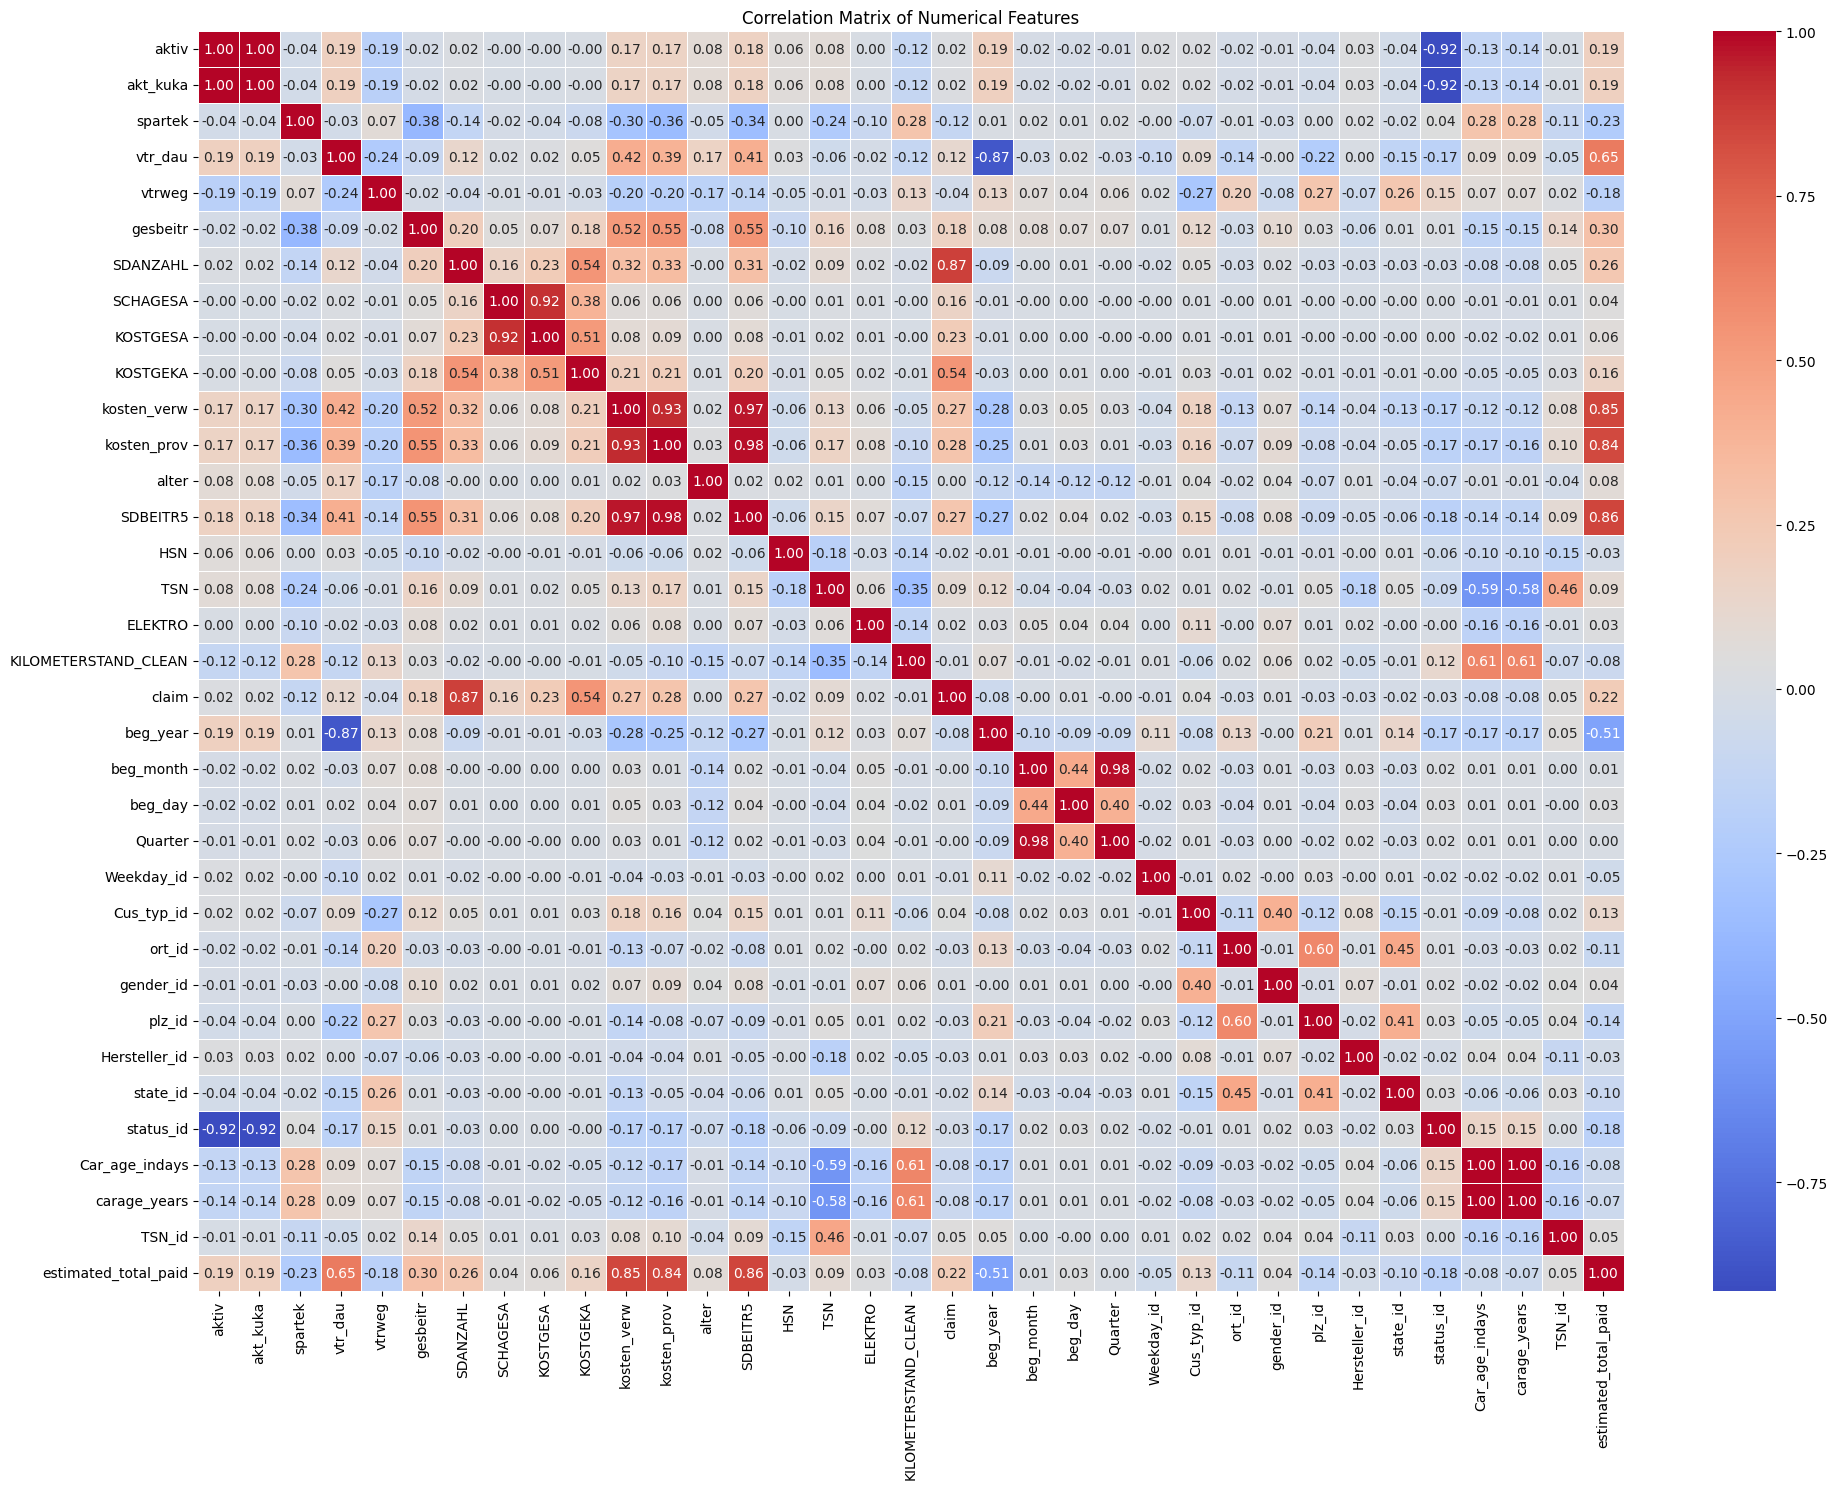

In [23]:
# Visualizing the correlation matrix of numerical features in the dataset
# This will help in understanding the relationships between different numerical features.
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# 2. Compute correlation matrix
corr_matrix = numeric_df.corr()

# 3. Display as heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [24]:
# Assuming 'SDANZAHL' is your target variable for claims prediction
X = df.select_dtypes(include=['number']).drop(['claim'], axis=1)
y = df['claim']

# Print shapes to verify
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (3945865, 34)
Target shape: (3945865,)


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [28]:
# List of columns where missing values should trigger row removal
cols_to_check = [
    'vtr_dau',
    'gesbeitr',
    'kosten_verw',
    'kosten_prov',
    'estimated_total_paid'
]

# Remove rows where any of these columns have NaN
df = df.dropna(subset=cols_to_check)

# Check the new shape
print("New shape:", df.shape)
    

New shape: (3945681, 52)


In [30]:
df.isnull().sum()

vsnr                         0
status                       0
aktiv                        0
akt_kuka                     0
spartek                      0
beginn                       0
vtr_dau                      0
kund_beg                     0
vtrweg                       0
gesbeitr                     0
SDANZAHL                     0
SCHAGESA                     0
KOSTGESA                     0
KOSTGEKA                     0
kosten_verw                  0
kosten_prov                  0
gfeld                        0
ort                          0
plz                          0
alter                        0
anr                          0
SDBEITR5                     0
HERSTELLER                   3
HSN                         34
TSN                          0
ELEKTRO                      0
KILOMETERSTAND_CLEAN    780740
ZW                           0
claim                        0
ersz_final                   0
beg_year                     0
beg_month                    0
beg_day 

Starting Deep Learning Pipeline for Claim Prediction WITH CLASS WEIGHTS
Dataset Shape: (3945865, 52)

Dataset Columns: ['vsnr', 'status', 'aktiv', 'akt_kuka', 'spartek', 'beginn', 'vtr_dau', 'kund_beg', 'vtrweg', 'gesbeitr', 'SDANZAHL', 'SCHAGESA', 'KOSTGESA', 'KOSTGEKA', 'kosten_verw', 'kosten_prov', 'gfeld', 'ort', 'plz', 'alter', 'anr', 'SDBEITR5', 'HERSTELLER', 'HSN', 'TSN', 'ELEKTRO', 'KILOMETERSTAND_CLEAN', 'ZW', 'claim', 'ersz_final', 'beg_year', 'beg_month', 'beg_day', 'weekday', 'Quarter', 'Weekday_id', 'Cus_type', 'Cus_typ_id', 'ort_id', 'Sex_id', 'Sex', 'gender_id', 'plz_id', 'Hersteller_id', 'state', 'state_id', 'status_id', 'First_reg', 'Car_age_indays', 'carage_years', 'TSN_id', 'estimated_total_paid']

Target Variable 'claim' Distribution:
claim
0    3513238
1     432627
Name: count, dtype: int64

Target Balance: claim
0    0.890359
1    0.109641
Name: proportion, dtype: float64

Class Imbalance Ratio: 8.12:1

FEATURE ANALYSIS

Feature Statistics:
            vtr_dau    

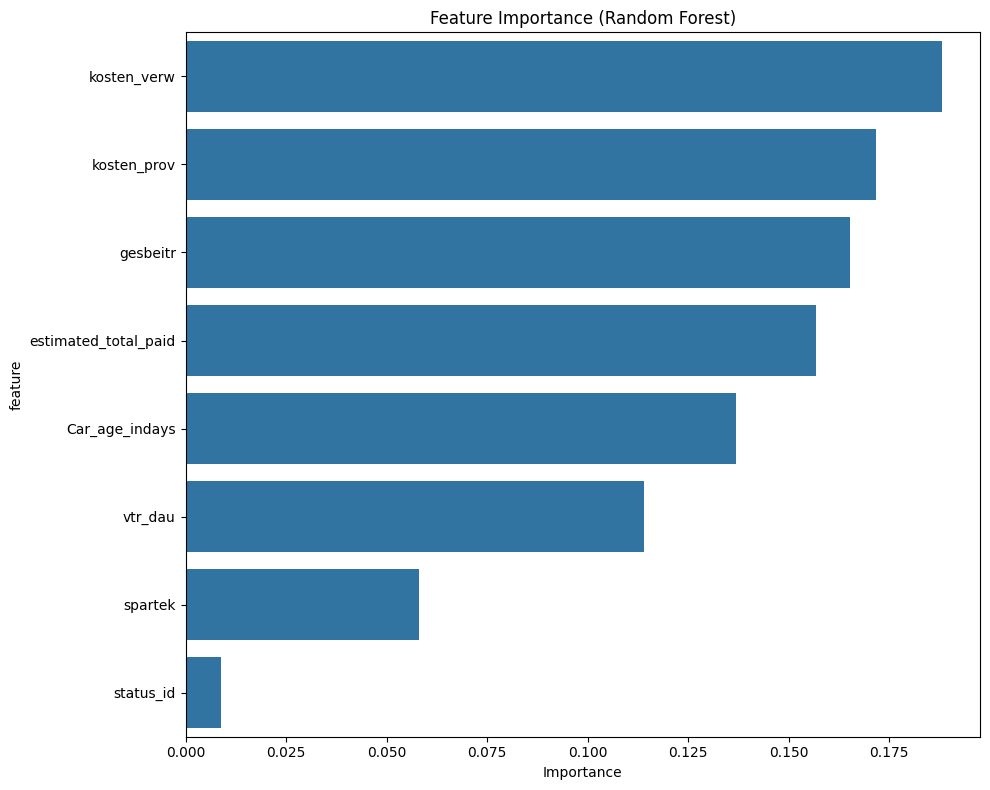


Model Architecture:
  Input features: 8


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 11,969 (46.75 KB)

 Non-trainable params: 448 (1.75 KB)


🎯 TRAINING WITH CLASS WEIGHTS:
   Class 0: weight = 0.5616
   Class 1: weight = 4.5604
Training Deep Learning Model with Class Weights...
Epoch 1/100
98647/98647 ━━━━━━━━━━━━━━━━━━━━ 188s 2ms/step - accuracy: 0.6904 - loss: 0.5708 - precision: 0.2215 - recall: 0.7253 - val_accuracy: 0.7226 - val_loss: 0.5288 - val_precision: 0.2406 - val_recall: 0.7098 - learning_rate: 0.0010
Epoch 2/100
98647/98647 ━━━━━━━━━━━━━━━━━━━━ 186s 2ms/step - accuracy: 0.6967 - loss: 0.5635 - precision: 0.2262 - recall: 0.7295 - val_accuracy: 0.7332 - val_loss: 0.5228 - val_precision: 0.2469 - val_recall: 0.6994 - learning_rate: 0.0010
Epoch 3/100
98647/98647 ━━━━━━━━━━━━━━━━━━━━ 190s 2ms/step - accuracy: 0.6987 - loss: 0.5616 - precision: 0.2275 - recall: 0.7296 - val_accuracy: 0.7265 - val_loss: 0.5256 - val_precision: 0.2433 - val_recall: 0.7082 - learning_rate: 0.0010
Epoch 4/100
98647/98647 ━━━━━━━━━━━━━━━━━━━━ 193s 2ms/step - accuracy: 0.7009 - loss: 0.5607 - precision: 0.2286 - recall: 0.7280 - val_ac

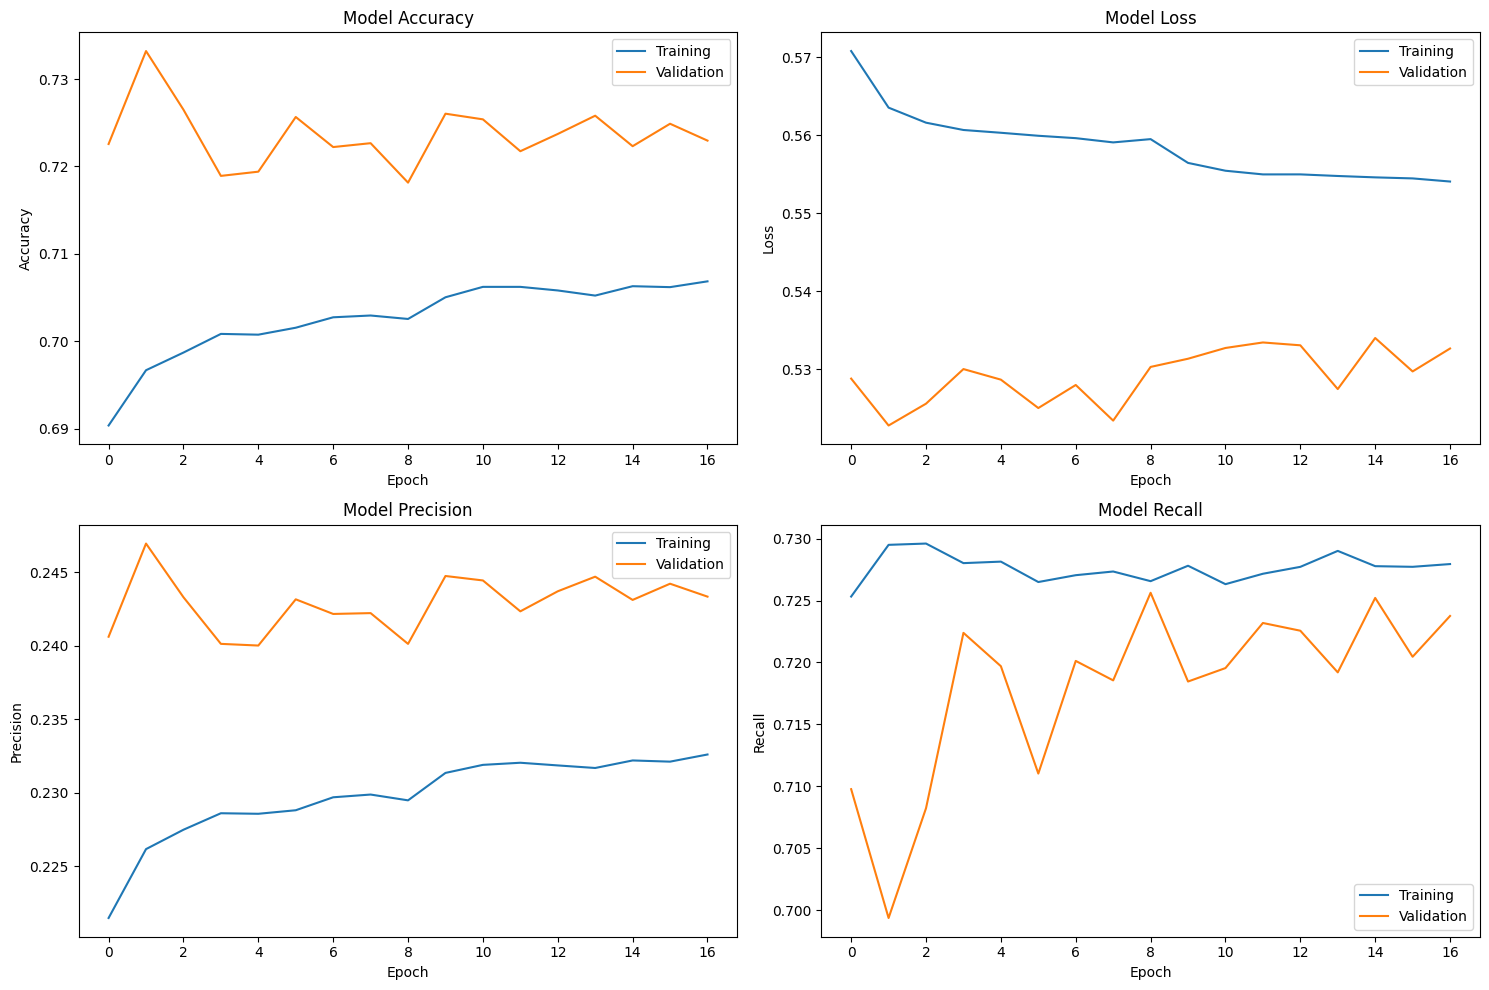

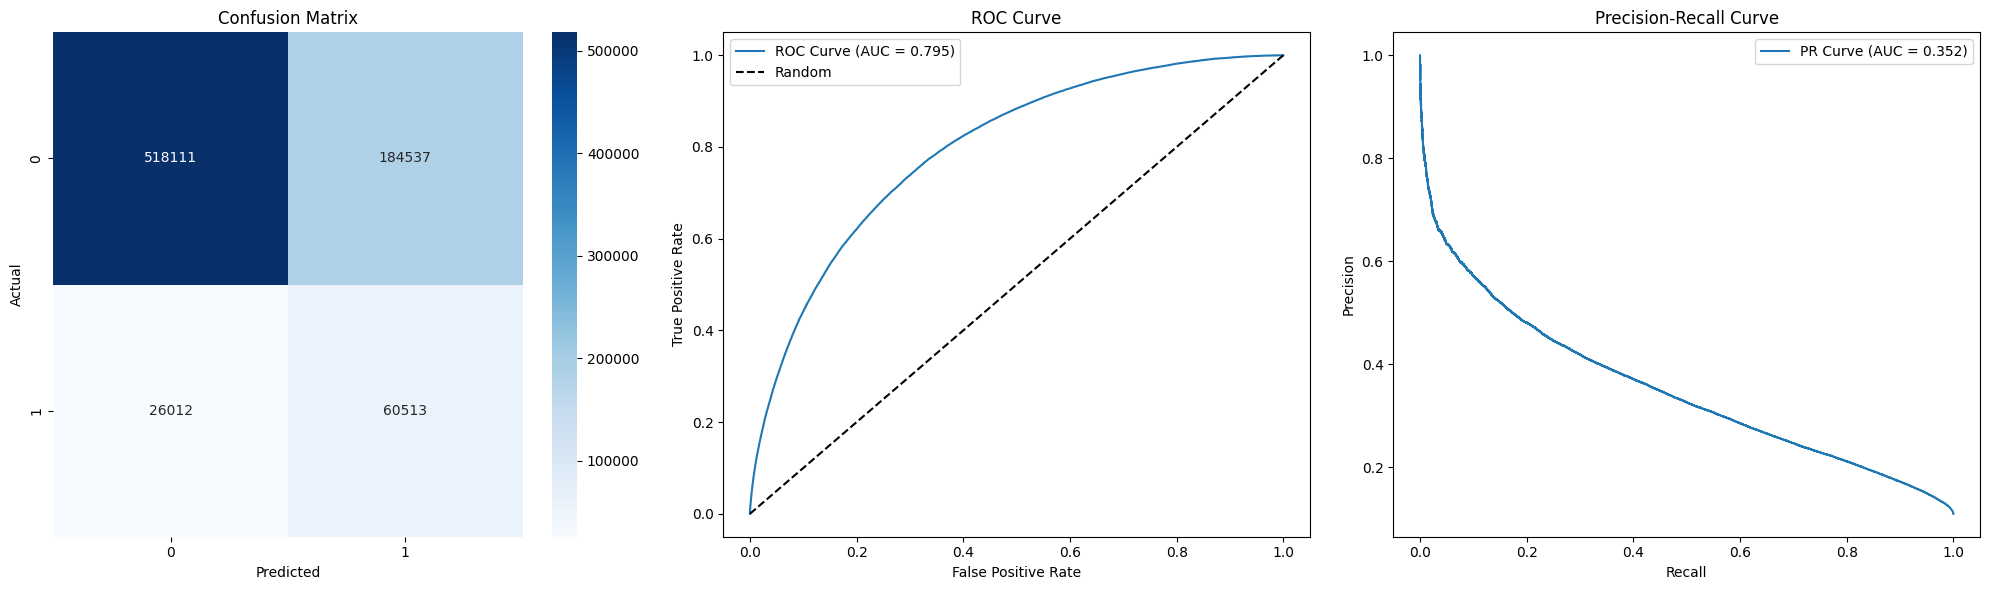


FINAL RESULTS SUMMARY - WITH CLASS WEIGHTS
✅ Test Accuracy: 0.7332 (73.32%)
✅ ROC AUC Score: 0.7950
✅ PR AUC Score: 0.3516
✅ Features Used: 8
✅ Model: Deep Neural Network with Class Weights

🎯 CLASS WEIGHTS USED:
   Class 0: 0.5616
   Class 1: 4.5604



📊 BEST THRESHOLDS:
   Best for Recall: 0.3 (Recall: 0.890)
   Best for F1: 0.6 (F1: 0.392)

💾 SAVING IMPROVED MODEL...
✅ Model saved as 'claim_prediction_model_with_weights.h5'
✅ Scaler saved as 'claim_scaler_with_weights.pkl'
✅ Features saved as 'selected_features_with_weights.pkl'
✅ Class weights saved as 'class_weights.pkl'


In [ ]:
# Deep Learning Solution for Claim Prediction - Manual Feature Selection WITH CLASS WEIGHTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class ClaimPredictionModel:
    def __init__(self, manual_features=None, target_column='claim'):
        self.scaler = StandardScaler()
        self.model = None
        self.feature_names = manual_features
        self.target_name = target_column
        self.class_weights = None  # NEW: Store class weights
        
    def load_and_explore_data(self, df):
        """Load and explore the dataset"""
        print("Dataset Shape:", df.shape)
        print(f"\nDataset Columns: {list(df.columns)}")
        
        # Check if target column exists
        if self.target_name not in df.columns:
            print(f"\nERROR: Target column '{self.target_name}' not found in dataset!")
            print("Available columns:", list(df.columns))
            raise KeyError(f"Target column '{self.target_name}' not found. Please specify the correct target column name.")
        
        print(f"\nTarget Variable '{self.target_name}' Distribution:")
        target_counts = df[self.target_name].value_counts()
        print(target_counts)
        
        target_balance = df[self.target_name].value_counts(normalize=True)
        print(f"\nTarget Balance: {target_balance}")
        
        # NEW: Calculate and display class imbalance ratio
        minority_class = target_counts.min()
        majority_class = target_counts.max()
        imbalance_ratio = majority_class / minority_class
        print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")
        
        return df
    
    def calculate_class_weights(self, y):
        """Calculate class weights for imbalanced data"""
        print("\n" + "="*50)
        print("CALCULATING CLASS WEIGHTS")
        print("="*50)
        
        # Get class distribution
        unique, counts = np.unique(y, return_counts=True)
        print("Class distribution:")
        for cls, count in zip(unique, counts):
            print(f"  Class {cls}: {count} samples ({count/len(y)*100:.1f}%)")
        
        # Calculate balanced class weights
        classes = np.unique(y)
        class_weights = compute_class_weight(
            class_weight='balanced',
            classes=classes,
            y=y
        )
        
        # Convert to dictionary format for Keras
        self.class_weights = dict(zip(classes, class_weights))
        
        print(f"\nCalculated class weights: {self.class_weights}")
        
        # Show the impact
        print("\nClass weight impact:")
        for cls, weight in self.class_weights.items():
            print(f"  Class {cls}: weight = {weight:.4f} (gives {weight:.1f}x more importance)")
        
        return self.class_weights
    
    def validate_features(self, df):
        """Validate that all manual features exist in the dataset"""
        if self.feature_names is None:
            raise ValueError("No features specified. Please provide manual_features when initializing the model.")
        
        missing_features = [f for f in self.feature_names if f not in df.columns]
        if missing_features:
            print(f"WARNING: These features are missing from the dataset: {missing_features}")
            # Remove missing features
            self.feature_names = [f for f in self.feature_names if f in df.columns]
            print(f"Using available features: {self.feature_names}")
        
        if len(self.feature_names) == 0:
            raise ValueError("No valid features found in the dataset.")
        
        print(f"\nUsing {len(self.feature_names)} manually selected features:")
        for i, feature in enumerate(self.feature_names, 1):
            print(f"  {i}. {feature}")
        
        return self.feature_names
    
    def analyze_selected_features(self, df):
        """Analyze the manually selected features"""
        print("\n" + "="*50)
        print("FEATURE ANALYSIS")
        print("="*50)
        
        # Basic statistics
        print("\nFeature Statistics:")
        print(df[self.feature_names].describe())
        
        # Missing values
        missing_values = df[self.feature_names].isnull().sum()
        if missing_values.sum() > 0:
            print("\nMissing Values:")
            for feature, missing in missing_values.items():
                if missing > 0:
                    print(f"  {feature}: {missing} ({missing/len(df)*100:.1f}%)")
        else:
            print("\nNo missing values found in selected features.")
        
        # Correlation with target
        print("\nCorrelation with Target Variable:")
        correlations = df[self.feature_names + [self.target_name]].corr()[self.target_name].drop(self.target_name)
        correlations_sorted = correlations.abs().sort_values(ascending=False)
        
        for feature in correlations_sorted.index:
            corr_val = correlations[feature]
            print(f"  {feature}: {corr_val:.4f}")
        
        return correlations_sorted
    
    def preprocess_data(self, df):
        """Preprocess the data for training"""
        # Validate features first
        selected_features = self.validate_features(df)
        
        # Prepare features and target
        X = df[selected_features].copy()
        y = df[self.target_name].copy()
        
        # Handle missing values
        print(f"\nHandling missing values...")
        X = X.fillna(X.median())
        print("Missing values filled with median.")
        
        # NEW: Calculate class weights before splitting
        self.calculate_class_weights(y)
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"\nData split:")
        print(f"  Training set: {X_train.shape[0]} samples")
        print(f"  Test set: {X_test.shape[0]} samples")
        
        # Scale the features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        return X_train_scaled, X_test_scaled, y_train, y_test, X_train, X_test
    
    def build_deep_learning_model(self, input_dim, hidden_layers=[128, 64, 32], dropout_rate=0.3):
        """Build a deep neural network model"""
        model = keras.Sequential()
        
        # Input layer
        model.add(layers.Dense(hidden_layers[0], activation='relu', input_dim=input_dim))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))
        
        # Hidden layers
        for units in hidden_layers[1:]:
            model.add(layers.Dense(units, activation='relu'))
            model.add(layers.BatchNormalization())
            model.add(layers.Dropout(dropout_rate))
        
        # Output layer (binary classification)
        model.add(layers.Dense(1, activation='sigmoid'))
        
        # Compile model
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'precision', 'recall']
        )
        
        return model
    
    def train_model(self, X_train, X_test, y_train, y_test, epochs=100, batch_size=32):
        """Train the deep learning model WITH CLASS WEIGHTS"""
        # Build model
        self.model = self.build_deep_learning_model(X_train.shape[1])
        
        print(f"\nModel Architecture:")
        print(f"  Input features: {X_train.shape[1]}")
        self.model.summary()
        
        # NEW: Display class weights being used
        print(f"\n🎯 TRAINING WITH CLASS WEIGHTS:")
        for cls, weight in self.class_weights.items():
            print(f"   Class {cls}: weight = {weight:.4f}")
        
        # Callbacks
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=15, restore_best_weights=True  # Increased patience
        )
        
        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2, patience=7, min_lr=0.0001  # Increased patience
        )
        
        # NEW: Train model WITH CLASS WEIGHTS
        print("Training Deep Learning Model with Class Weights...")
        history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test),
            class_weight=self.class_weights,  # 🔥 THIS IS THE KEY CHANGE!
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        
        return history
    
    def evaluate_model_comprehensive(self, X_test, y_test, threshold=0.5):
        """Comprehensive evaluation with focus on minority class performance"""
        # Predictions
        y_pred_proba = self.model.predict(X_test)
        y_pred = (y_pred_proba > threshold).astype(int).flatten()
        
        # Metrics
        print("\n" + "="*50)
        print(f"MODEL EVALUATION RESULTS (threshold={threshold})")
        print("="*50)
        
        print(f"Test Accuracy: {np.mean(y_pred == y_test):.4f}")
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
        
        # NEW: Add PR AUC for imbalanced data
        pr_auc = average_precision_score(y_test, y_pred_proba)
        print(f"PR AUC Score: {pr_auc:.4f}")
        
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        # NEW: Detailed minority class analysis
        cm = confusion_matrix(y_test, y_pred)
        print("\nConfusion Matrix:")
        print(cm)
        
        if len(cm) == 2:  # Binary classification
            tn, fp, fn, tp = cm.ravel()
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall for positive class
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Recall for negative class
            
            print(f"\n🎯 MINORITY CLASS (Class 1) PERFORMANCE:")
            print(f"   Sensitivity (Recall): {sensitivity:.4f} ({sensitivity*100:.1f}%)")
            print(f"   Specificity: {specificity:.4f} ({specificity*100:.1f}%)")
            print(f"   True Positives: {tp}")
            print(f"   False Negatives: {fn}")
            print(f"   % of Class 1 correctly identified: {sensitivity*100:.1f}%")
            
            # Show improvement needed
            if sensitivity < 0.7:
                print(f"\n⚠️  RECOMMENDATION: Recall for minority class is {sensitivity*100:.1f}%")
                print("   Consider:")
                print("   - Lowering prediction threshold (try 0.3 or 0.4)")
                print("   - Increasing minority class weight manually")
                print("   - Using SMOTE for oversampling")
        
        return y_pred, y_pred_proba
    
    def evaluate_multiple_thresholds(self, X_test, y_test):
        """Evaluate model at different thresholds to optimize recall"""
        print("\n" + "="*50)
        print("THRESHOLD OPTIMIZATION FOR MINORITY CLASS")
        print("="*50)
        
        y_pred_proba = self.model.predict(X_test)
        thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
        
        results = []
        for threshold in thresholds:
            y_pred = (y_pred_proba > threshold).astype(int).flatten()
            
            # Calculate metrics
            cm = confusion_matrix(y_test, y_pred)
            if len(cm) == 2:
                tn, fp, fn, tp = cm.ravel()
                precision = tp / (tp + fp) if (tp + fp) > 0 else 0
                recall = tp / (tp + fn) if (tp + fn) > 0 else 0
                f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
                accuracy = (tp + tn) / (tp + tn + fp + fn)
                
                results.append({
                    'threshold': threshold,
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1': f1,
                    'tp': tp,
                    'fn': fn
                })
        
        # Display results
        print(f"{'Threshold':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10} {'TP':<5} {'FN':<5}")
        print("-" * 70)
        for result in results:
            print(f"{result['threshold']:<10.1f} {result['accuracy']:<10.3f} {result['precision']:<10.3f} "
                  f"{result['recall']:<10.3f} {result['f1']:<10.3f} {result['tp']:<5} {result['fn']:<5}")
        
        # Find best threshold for recall
        best_recall = max(results, key=lambda x: x['recall'])
        best_f1 = max(results, key=lambda x: x['f1'])
        
        print(f"\n🎯 BEST THRESHOLDS:")
        print(f"   Best for Recall: {best_recall['threshold']} (Recall: {best_recall['recall']:.3f})")
        print(f"   Best for F1: {best_f1['threshold']} (F1: {best_f1['f1']:.3f})")
        
        return results
    
    def plot_training_history(self, history):
        """Plot training history"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Accuracy
        axes[0, 0].plot(history.history['accuracy'], label='Training')
        axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
        axes[0, 0].set_title('Model Accuracy')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].legend()
        
        # Loss
        axes[0, 1].plot(history.history['loss'], label='Training')
        axes[0, 1].plot(history.history['val_loss'], label='Validation')
        axes[0, 1].set_title('Model Loss')
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('Loss')
        axes[0, 1].legend()
        
        # Precision
        axes[1, 0].plot(history.history['precision'], label='Training')
        axes[1, 0].plot(history.history['val_precision'], label='Validation')
        axes[1, 0].set_title('Model Precision')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Precision')
        axes[1, 0].legend()
        
        # Recall
        axes[1, 1].plot(history.history['recall'], label='Training')
        axes[1, 1].plot(history.history['val_recall'], label='Validation')
        axes[1, 1].set_title('Model Recall')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Recall')
        axes[1, 1].legend()
        
        plt.tight_layout()
        plt.show()
    
    def plot_confusion_matrix_and_roc(self, y_test, y_pred, y_pred_proba):
        """Plot confusion matrix, ROC curve, and PR curve"""
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title('Confusion Matrix')
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('Actual')
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        axes[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
        axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title('ROC Curve')
        axes[1].legend()
        
        # NEW: Precision-Recall Curve (better for imbalanced data)
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = average_precision_score(y_test, y_pred_proba)
        axes[2].plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.3f})')
        axes[2].set_xlabel('Recall')
        axes[2].set_ylabel('Precision')
        axes[2].set_title('Precision-Recall Curve')
        axes[2].legend()
        
        plt.tight_layout()
        plt.show()
    
    def feature_importance_analysis(self, X_train, y_train):
        """Analyze feature importance using Random Forest"""
        print("\n" + "="*50)
        print("FEATURE IMPORTANCE ANALYSIS")
        print("="*50)
        
        # Train Random Forest for feature importance
        rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')  # Also use balanced weights
        rf.fit(X_train, y_train)
        
        # Get feature importance
        importance_df = pd.DataFrame({
            'feature': self.feature_names,
            'importance': rf.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("Feature Importance Ranking:")
        for i, (_, row) in enumerate(importance_df.iterrows(), 1):
            print(f"  {i}. {row['feature']}: {row['importance']:.4f}")
        
        # Plot feature importance
        plt.figure(figsize=(10, 8))
        sns.barplot(data=importance_df, x='importance', y='feature')
        plt.title('Feature Importance (Random Forest)')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()
        
        return importance_df
    
    def predict_new_data(self, new_data, threshold=0.5):
        """Make predictions on new data"""
        # Ensure new_data has the same features
        try:
            new_data_selected = new_data[self.feature_names]
        except KeyError as e:
            missing_cols = [col for col in self.feature_names if col not in new_data.columns]
            raise KeyError(f"Missing columns in new data: {missing_cols}")
        
        new_data_scaled = self.scaler.transform(new_data_selected.fillna(new_data_selected.median()))
        
        # Predict
        predictions_proba = self.model.predict(new_data_scaled)
        predictions = (predictions_proba > threshold).astype(int).flatten()
        
        return predictions, predictions_proba
    
    def run_complete_pipeline(self, df):
        """Run the complete machine learning pipeline WITH CLASS WEIGHTS"""
        print("Starting Deep Learning Pipeline for Claim Prediction WITH CLASS WEIGHTS")
        print("="*70)
        
        # 1. Data exploration
        df = self.load_and_explore_data(df)
        
        # 2. Analyze selected features
        correlations = self.analyze_selected_features(df)
        
        # 3. Data preprocessing (includes class weight calculation)
        X_train, X_test, y_train, y_test, X_train_orig, X_test_orig = self.preprocess_data(df)
        
        # 4. Feature importance analysis
        importance_df = self.feature_importance_analysis(X_train_orig, y_train)
        
        # 5. Train model WITH CLASS WEIGHTS
        history = self.train_model(X_train, X_test, y_train, y_test)
        
        # 6. Comprehensive evaluation
        y_pred, y_pred_proba = self.evaluate_model_comprehensive(X_test, y_test)
        
        # 7. NEW: Threshold optimization
        threshold_results = self.evaluate_multiple_thresholds(X_test, y_test)
        
        # 8. Visualizations
        self.plot_training_history(history)
        self.plot_confusion_matrix_and_roc(y_test, y_pred, y_pred_proba)
        
        return {
            'model': self.model,
            'scaler': self.scaler,
            'selected_features': self.feature_names,
            'class_weights': self.class_weights,  # NEW
            'correlations': correlations,
            'importance_df': importance_df,
            'history': history,
            'threshold_results': threshold_results,  # NEW
            'test_accuracy': np.mean(y_pred == y_test),
            'test_auc': roc_auc_score(y_test, y_pred_proba),
            'test_pr_auc': average_precision_score(y_test, y_pred_proba)  # NEW
        }

# Helper function to explore your dataset
def explore_dataset(df):
    """Explore the dataset to understand its structure"""
    print("DATASET EXPLORATION")
    print("="*50)
    print(f"Shape: {df.shape}")
    print(f"\nColumn names:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i}. {col}")
    
    print(f"\nData types:")
    print(df.dtypes)
    
    print(f"\nFirst few rows:")
    print(df.head())
    
    # Look for potential target columns
    potential_targets = []
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            unique_vals = df[col].nunique()
            if unique_vals == 2:  # Binary column
                potential_targets.append(col)
    
    if potential_targets:
        print(f"\nPotential binary target columns (might be your claim indicator):")
        for col in potential_targets:
            print(f"  - {col}: {df[col].value_counts().to_dict()}")
    
    return df

# Usage with your manual features:

# Define your features and target
manual_features = [
    'vtr_dau', 'kosten_verw', 'kosten_prov', 
    'spartek', 'status_id', 'Car_age_indays', 'estimated_total_paid'
]

# Initialize with manual features and correct target column name
claim_predictor = ClaimPredictionModel(
    manual_features=manual_features, 
    target_column='claim'  # Replace with actual target column name
)

# Run the pipeline
results = claim_predictor.run_complete_pipeline(df)

# DISPLAY THE IMPROVED RESULTS
print("\n" + "="*70)
print("FINAL RESULTS SUMMARY - WITH CLASS WEIGHTS")
print("="*70)
print(f"✅ Test Accuracy: {results['test_accuracy']:.4f} ({results['test_accuracy']*100:.2f}%)")
print(f"✅ ROC AUC Score: {results['test_auc']:.4f}")
print(f"✅ PR AUC Score: {results['test_pr_auc']:.4f}")  # NEW - Better for imbalanced data
print(f"✅ Features Used: {len(results['selected_features'])}")
print(f"✅ Model: Deep Neural Network with Class Weights")

print(f"\n🎯 CLASS WEIGHTS USED:")
for cls, weight in results['class_weights'].items():
    print(f"   Class {cls}: {weight:.4f}")

print(f"\n📊 BEST THRESHOLDS:")
best_recall = max(results['threshold_results'], key=lambda x: x['recall'])
best_f1 = max(results['threshold_results'], key=lambda x: x['f1'])
print(f"   Best for Recall: {best_recall['threshold']} (Recall: {best_recall['recall']:.3f})")
print(f"   Best for F1: {best_f1['threshold']} (F1: {best_f1['f1']:.3f})")

# SAVE THE IMPROVED MODEL
print(f"\n💾 SAVING IMPROVED MODEL...")
results['model'].save('claim_prediction_model_with_weights.h5')
import joblib
joblib.dump(results['scaler'], 'claim_scaler_with_weights.pkl')
joblib.dump(results['selected_features'], 'selected_features_with_weights.pkl')
joblib.dump(results['class_weights'], 'class_weights.pkl')  # NEW - Save class weights
print("✅ Model saved as 'claim_prediction_model_with_weights.h5'")
print("✅ Scaler saved as 'claim_scaler_with_weights.pkl'")
print("✅ Features saved as 'selected_features_with_weights.pkl'")
print("✅ Class weights saved as 'class_weights.pkl'")

# Function to make predictions with optimal threshold
def make_predictions_with_optimal_threshold(claim_predictor, new_data, optimal_threshold=None):
    """Make predictions on new data with optimal threshold"""
    if optimal_threshold is None:
        # Use the threshold that gave best F1 score
        best_f1 = max(results['threshold_results'], key=lambda x: x['f1'])
        optimal_threshold = best_f1['threshold']
    
    print(f"\n🎯 Making predictions with optimal threshold: {optimal_threshold}")
    
    predictions, probabilities = claim_predictor.predict_new_data(new_data, threshold=optimal_threshold)
    
    # Create results DataFrame
    results_df = pd.DataFrame({
        'Prediction': predictions,
        'Probability': probabilities.flatten(),
        'Risk_Level': ['High Risk' if p > 0.7 else 'Medium Risk' if p > 0.3 else 'Low Risk' 
                      for p in probabilities.flatten()]
    })
    
    print(f"📈 PREDICTION RESULTS:")
    print(f"   Total records predicted: {len(predictions)}")
    print(f"   Predicted Claims: {sum(predictions)} ({sum(predictions)/len(predictions)*100:.1f}%)")
    print(f"   Predicted No Claims: {len(predictions)-sum(predictions)} ({(len(predictions)-sum(predictions))/len(predictions)*100:.1f}%)")
    
    return results_df

🚀 Starting XGBoost Binary Classification Pipeline

📊 Data Preprocessing
------------------------------
Original dataset shape: (3945681, 52)
Features available: ['vtr_dau', 'kosten_verw', 'kosten_prov', 'spartek', 'status_id', 'Car_age_indays', 'estimated_total_paid']
Target available: True
Feature matrix shape: (3945681, 7)
Target vector shape: (3945681,)
✅ No missing values found

Target distribution:
  Class 0: 3,513,093 samples (89.0%)
  Class 1: 432,588 samples (11.0%)
Scale pos weight (neg/pos): 8.121

🔀 Data Splitting
--------------------


[I 2025-08-11 09:24:41,599] A new study created in memory with name: no-name-507e02f4-2268-4a60-b477-1802b2f80cbf


Train set: 2,367,408 samples (60.0%)
Valid set: 789,136 samples (20.0%)
Test set:  789,137 samples (20.0%)
Train positive rate: 0.110
Valid positive rate: 0.110
Test positive rate: 0.110

🎯 Hyperparameter Tuning with Optuna
----------------------------------------
Running Optuna optimization...


Best trial: 0. Best value: 0.334285:   2%|▏         | 1/50 [01:54<1:33:17, 114.23s/it]

[I 2025-08-11 09:26:35,826] Trial 0 finished with value: 0.3342845558824031 and parameters: {'max_depth': 5, 'learning_rate': 0.2536999076681772, 'n_estimators': 759, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.02904180608409973, 'reg_alpha': 0.8661761457749352, 'reg_lambda': 1.6011150117432087}. Best is trial 0 with value: 0.3342845558824031.


Best trial: 0. Best value: 0.334285:   4%|▍         | 2/50 [05:35<2:21:43, 177.15s/it]

[I 2025-08-11 09:30:17,017] Trial 1 finished with value: 0.325062497925671 and parameters: {'max_depth': 8, 'learning_rate': 0.010725209743171996, 'n_estimators': 973, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.09170225492671691, 'reg_alpha': 0.3042422429595377, 'reg_lambda': 1.524756431632238}. Best is trial 0 with value: 0.3342845558824031.


Best trial: 0. Best value: 0.334285:   6%|▌         | 3/50 [07:43<2:01:06, 154.61s/it]

[I 2025-08-11 09:32:24,820] Trial 2 finished with value: 0.32534928684874 and parameters: {'max_depth': 6, 'learning_rate': 0.02692655251486473, 'n_estimators': 651, 'subsample': 0.6557975442608167, 'colsample_bytree': 0.7168578594140873, 'min_child_weight': 4, 'gamma': 0.22803499210851796, 'reg_alpha': 0.7851759613930136, 'reg_lambda': 1.1996737821583596}. Best is trial 0 with value: 0.3342845558824031.


Best trial: 0. Best value: 0.334285:   8%|▊         | 4/50 [08:13<1:21:01, 105.69s/it]

[I 2025-08-11 09:32:55,498] Trial 3 finished with value: 0.3225855063542177 and parameters: {'max_depth': 7, 'learning_rate': 0.07500118950416987, 'n_estimators': 141, 'subsample': 0.8430179407605753, 'colsample_bytree': 0.6682096494749166, 'min_child_weight': 1, 'gamma': 0.4744427686266666, 'reg_alpha': 0.9656320330745594, 'reg_lambda': 1.8083973481164612}. Best is trial 0 with value: 0.3342845558824031.


Best trial: 0. Best value: 0.334285:  10%|█         | 5/50 [10:33<1:28:30, 118.00s/it]

[I 2025-08-11 09:35:15,335] Trial 4 finished with value: 0.31774448537755684 and parameters: {'max_depth': 5, 'learning_rate': 0.013940346079873234, 'n_estimators': 716, 'subsample': 0.7760609974958406, 'colsample_bytree': 0.6488152939379115, 'min_child_weight': 5, 'gamma': 0.017194260557609198, 'reg_alpha': 0.9093204020787821, 'reg_lambda': 1.258779981600017}. Best is trial 0 with value: 0.3342845558824031.


Best trial: 0. Best value: 0.334285:  12%|█▏        | 6/50 [12:39<1:28:26, 120.61s/it]

[I 2025-08-11 09:37:21,004] Trial 5 finished with value: 0.3281672036455622 and parameters: {'max_depth': 8, 'learning_rate': 0.028869220380495747, 'n_estimators': 568, 'subsample': 0.8186841117373118, 'colsample_bytree': 0.6739417822102108, 'min_child_weight': 10, 'gamma': 0.3875664116805573, 'reg_alpha': 0.9394989415641891, 'reg_lambda': 1.894827350427649}. Best is trial 0 with value: 0.3342845558824031.


Best trial: 0. Best value: 0.334285:  14%|█▍        | 7/50 [13:16<1:06:54, 93.37s/it] 

[I 2025-08-11 09:37:58,302] Trial 6 finished with value: 0.3309437135308657 and parameters: {'max_depth': 7, 'learning_rate': 0.22999586428143728, 'n_estimators': 179, 'subsample': 0.6783931449676581, 'colsample_bytree': 0.6180909155642152, 'min_child_weight': 4, 'gamma': 0.194338644844741, 'reg_alpha': 0.2713490317738959, 'reg_lambda': 1.8287375091519293}. Best is trial 0 with value: 0.3342845558824031.


Best trial: 0. Best value: 0.334285:  16%|█▌        | 8/50 [15:05<1:08:51, 98.37s/it]

[I 2025-08-11 09:39:47,380] Trial 7 finished with value: 0.3225473497489285 and parameters: {'max_depth': 5, 'learning_rate': 0.026000059117302653, 'n_estimators': 588, 'subsample': 0.6563696899899051, 'colsample_bytree': 0.9208787923016158, 'min_child_weight': 1, 'gamma': 0.49344346830025865, 'reg_alpha': 0.7722447692966574, 'reg_lambda': 1.1987156815341724}. Best is trial 0 with value: 0.3342845558824031.


Best trial: 0. Best value: 0.334285:  18%|█▊        | 9/50 [17:04<1:11:30, 104.64s/it]

[I 2025-08-11 09:41:45,789] Trial 8 finished with value: 0.33138547674049207 and parameters: {'max_depth': 3, 'learning_rate': 0.1601531217136121, 'n_estimators': 736, 'subsample': 0.8916028672163949, 'colsample_bytree': 0.9085081386743783, 'min_child_weight': 1, 'gamma': 0.1792328642721363, 'reg_alpha': 0.11586905952512971, 'reg_lambda': 1.8631034258755936}. Best is trial 0 with value: 0.3342845558824031.


Best trial: 0. Best value: 0.334285:  20%|██        | 10/50 [17:39<55:23, 83.08s/it]  

[I 2025-08-11 09:42:20,607] Trial 9 finished with value: 0.3207209974340554 and parameters: {'max_depth': 7, 'learning_rate': 0.030816017044468066, 'n_estimators': 157, 'subsample': 0.7243929286862649, 'colsample_bytree': 0.7300733288106989, 'min_child_weight': 8, 'gamma': 0.31877873567760656, 'reg_alpha': 0.8872127425763265, 'reg_lambda': 1.4722149251619494}. Best is trial 0 with value: 0.3342845558824031.


Best trial: 0. Best value: 0.334285:  22%|██▏       | 11/50 [18:31<47:51, 73.63s/it]

[I 2025-08-11 09:43:12,817] Trial 10 finished with value: 0.3342344295734986 and parameters: {'max_depth': 10, 'learning_rate': 0.10251868762308491, 'n_estimators': 377, 'subsample': 0.9729161367647149, 'colsample_bytree': 0.8085360047450805, 'min_child_weight': 7, 'gamma': 0.007572118551378418, 'reg_alpha': 0.6233765186294654, 'reg_lambda': 1.5705478648816835}. Best is trial 0 with value: 0.3342845558824031.


Best trial: 11. Best value: 0.335412:  24%|██▍       | 12/50 [19:25<42:50, 67.65s/it]

[I 2025-08-11 09:44:06,771] Trial 11 finished with value: 0.335412393516234 and parameters: {'max_depth': 10, 'learning_rate': 0.10878192906783846, 'n_estimators': 355, 'subsample': 0.9845355085773861, 'colsample_bytree': 0.8243626807262747, 'min_child_weight': 7, 'gamma': 0.005511196749239465, 'reg_alpha': 0.5732909776512292, 'reg_lambda': 1.5916836359300597}. Best is trial 11 with value: 0.335412393516234.


Best trial: 11. Best value: 0.335412:  26%|██▌       | 13/50 [19:52<34:13, 55.50s/it]

[I 2025-08-11 09:44:34,337] Trial 12 finished with value: 0.3278143977736967 and parameters: {'max_depth': 10, 'learning_rate': 0.2696981520489218, 'n_estimators': 389, 'subsample': 0.9988735536131848, 'colsample_bytree': 0.8011757097674834, 'min_child_weight': 7, 'gamma': 0.10361185829795089, 'reg_alpha': 0.5316683151647108, 'reg_lambda': 1.656116398580863}. Best is trial 11 with value: 0.335412393516234.


Best trial: 13. Best value: 0.336667:  28%|██▊       | 14/50 [22:32<52:10, 86.95s/it]

[I 2025-08-11 09:47:13,946] Trial 13 finished with value: 0.3366670905757859 and parameters: {'max_depth': 4, 'learning_rate': 0.1195293009741146, 'n_estimators': 937, 'subsample': 0.8923645209213664, 'colsample_bytree': 0.8603078433752279, 'min_child_weight': 9, 'gamma': 0.09369114519510557, 'reg_alpha': 0.6762242085849526, 'reg_lambda': 1.4181407616277675}. Best is trial 13 with value: 0.3366670905757859.


Best trial: 13. Best value: 0.336667:  30%|███       | 15/50 [25:27<1:06:17, 113.63s/it]

[I 2025-08-11 09:50:09,423] Trial 14 finished with value: 0.33129369652836915 and parameters: {'max_depth': 3, 'learning_rate': 0.11959521783820497, 'n_estimators': 992, 'subsample': 0.9176849139693809, 'colsample_bytree': 0.9990023734974547, 'min_child_weight': 10, 'gamma': 0.13439882868965722, 'reg_alpha': 0.6295403788851194, 'reg_lambda': 1.3553828710805016}. Best is trial 13 with value: 0.3366670905757859.


Best trial: 15. Best value: 0.338738:  32%|███▏      | 16/50 [26:56<1:00:04, 106.02s/it]

[I 2025-08-11 09:51:37,763] Trial 15 finished with value: 0.3387379790857334 and parameters: {'max_depth': 9, 'learning_rate': 0.05536781885416231, 'n_estimators': 377, 'subsample': 0.8785820069939148, 'colsample_bytree': 0.8669986412419507, 'min_child_weight': 8, 'gamma': 0.08320175162055077, 'reg_alpha': 0.3967790149732189, 'reg_lambda': 1.3998659922894783}. Best is trial 15 with value: 0.3387379790857334.


Best trial: 16. Best value: 0.338805:  34%|███▍      | 17/50 [28:42<58:19, 106.05s/it]  

[I 2025-08-11 09:53:23,869] Trial 16 finished with value: 0.33880454351166783 and parameters: {'max_depth': 9, 'learning_rate': 0.05710036450641907, 'n_estimators': 865, 'subsample': 0.881275718926785, 'colsample_bytree': 0.8831255026902968, 'min_child_weight': 9, 'gamma': 0.2597588727396129, 'reg_alpha': 0.3887691947863863, 'reg_lambda': 1.0131792143809235}. Best is trial 16 with value: 0.33880454351166783.


Best trial: 17. Best value: 0.339232:  36%|███▌      | 18/50 [30:47<59:40, 111.89s/it]

[I 2025-08-11 09:55:29,375] Trial 17 finished with value: 0.33923209844142266 and parameters: {'max_depth': 9, 'learning_rate': 0.044207413119892805, 'n_estimators': 487, 'subsample': 0.7748358162174968, 'colsample_bytree': 0.9001148556951641, 'min_child_weight': 8, 'gamma': 0.30549973731056823, 'reg_alpha': 0.3328241628661682, 'reg_lambda': 1.0262856549771904}. Best is trial 17 with value: 0.33923209844142266.


Best trial: 17. Best value: 0.339232:  38%|███▊      | 19/50 [33:20<1:04:10, 124.21s/it]

[I 2025-08-11 09:58:02,276] Trial 18 finished with value: 0.3391087530069538 and parameters: {'max_depth': 9, 'learning_rate': 0.04088379711012227, 'n_estimators': 843, 'subsample': 0.7715458175633327, 'colsample_bytree': 0.9733916524110406, 'min_child_weight': 9, 'gamma': 0.30642701219344165, 'reg_alpha': 0.09017405294742775, 'reg_lambda': 1.025009049301014}. Best is trial 17 with value: 0.33923209844142266.


Best trial: 17. Best value: 0.339232:  40%|████      | 20/50 [35:17<1:00:59, 121.98s/it]

[I 2025-08-11 09:59:59,048] Trial 19 finished with value: 0.3382970636350917 and parameters: {'max_depth': 9, 'learning_rate': 0.04302553031342479, 'n_estimators': 461, 'subsample': 0.7727431143998708, 'colsample_bytree': 0.9827386395322287, 'min_child_weight': 6, 'gamma': 0.3306454190300859, 'reg_alpha': 0.02588683038664047, 'reg_lambda': 1.0273111156245607}. Best is trial 17 with value: 0.33923209844142266.


Best trial: 17. Best value: 0.339232:  42%|████▏     | 21/50 [38:35<1:10:03, 144.95s/it]

[I 2025-08-11 10:03:17,563] Trial 20 finished with value: 0.33277031399436824 and parameters: {'max_depth': 8, 'learning_rate': 0.01806484936913213, 'n_estimators': 835, 'subsample': 0.6063229472952539, 'colsample_bytree': 0.9462019089084135, 'min_child_weight': 9, 'gamma': 0.4110044160911267, 'reg_alpha': 0.16067938882065086, 'reg_lambda': 1.1137372468158142}. Best is trial 17 with value: 0.33923209844142266.


Best trial: 17. Best value: 0.339232:  44%|████▍     | 22/50 [40:28<1:03:10, 135.37s/it]

[I 2025-08-11 10:05:10,578] Trial 21 finished with value: 0.3374768281995193 and parameters: {'max_depth': 9, 'learning_rate': 0.046206968813355905, 'n_estimators': 834, 'subsample': 0.7431406656026933, 'colsample_bytree': 0.8832149209375771, 'min_child_weight': 9, 'gamma': 0.2879503389633419, 'reg_alpha': 0.40219525867958816, 'reg_lambda': 1.00582591122719}. Best is trial 17 with value: 0.33923209844142266.


Best trial: 17. Best value: 0.339232:  46%|████▌     | 23/50 [42:11<56:25, 125.38s/it]  

[I 2025-08-11 10:06:52,658] Trial 22 finished with value: 0.3390563750283725 and parameters: {'max_depth': 9, 'learning_rate': 0.06282901703077139, 'n_estimators': 854, 'subsample': 0.7966598165700797, 'colsample_bytree': 0.9662004507441823, 'min_child_weight': 8, 'gamma': 0.25825718924254437, 'reg_alpha': 0.4209129761652648, 'reg_lambda': 1.1270533655049564}. Best is trial 17 with value: 0.33923209844142266.


Best trial: 17. Best value: 0.339232:  48%|████▊     | 24/50 [43:47<50:32, 116.63s/it]

[I 2025-08-11 10:08:28,887] Trial 23 finished with value: 0.33740457402360613 and parameters: {'max_depth': 8, 'learning_rate': 0.07317914095843599, 'n_estimators': 517, 'subsample': 0.7240509689063387, 'colsample_bytree': 0.9520104938890753, 'min_child_weight': 8, 'gamma': 0.362580774849707, 'reg_alpha': 0.2258015298483848, 'reg_lambda': 1.1121125502925415}. Best is trial 17 with value: 0.33923209844142266.


Best trial: 17. Best value: 0.339232:  50%|█████     | 25/50 [45:00<43:12, 103.70s/it]

[I 2025-08-11 10:09:42,421] Trial 24 finished with value: 0.33646877861508184 and parameters: {'max_depth': 10, 'learning_rate': 0.04087971200804147, 'n_estimators': 284, 'subsample': 0.7885303435593002, 'colsample_bytree': 0.9613914407297964, 'min_child_weight': 6, 'gamma': 0.27835548477554617, 'reg_alpha': 0.024065545279507855, 'reg_lambda': 1.2849927013649398}. Best is trial 17 with value: 0.33923209844142266.


Best trial: 25. Best value: 0.339423:  52%|█████▏    | 26/50 [46:34<40:15, 100.65s/it]

[I 2025-08-11 10:11:15,969] Trial 25 finished with value: 0.33942303606234686 and parameters: {'max_depth': 9, 'learning_rate': 0.07110589035342733, 'n_estimators': 656, 'subsample': 0.7451512558534007, 'colsample_bytree': 0.9253613333937809, 'min_child_weight': 10, 'gamma': 0.2154675521230934, 'reg_alpha': 0.4705643406101783, 'reg_lambda': 1.1184330068505588}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 25. Best value: 0.339423:  54%|█████▍    | 27/50 [49:04<44:13, 115.39s/it]

[I 2025-08-11 10:13:45,723] Trial 26 finished with value: 0.3317394017074075 and parameters: {'max_depth': 8, 'learning_rate': 0.01938880829956606, 'n_estimators': 644, 'subsample': 0.7442020686460581, 'colsample_bytree': 0.9265839868294679, 'min_child_weight': 10, 'gamma': 0.20085502255340892, 'reg_alpha': 0.4918167156255471, 'reg_lambda': 1.074567943250918}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 25. Best value: 0.339423:  56%|█████▌    | 28/50 [50:43<40:34, 110.66s/it]

[I 2025-08-11 10:15:25,362] Trial 27 finished with value: 0.3259517927853566 and parameters: {'max_depth': 6, 'learning_rate': 0.03817848754575201, 'n_estimators': 482, 'subsample': 0.6950378312655437, 'colsample_bytree': 0.7488621218277184, 'min_child_weight': 10, 'gamma': 0.3173884051198908, 'reg_alpha': 0.12563430120781105, 'reg_lambda': 1.1894707936896687}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 25. Best value: 0.339423:  58%|█████▊    | 29/50 [51:49<33:59, 97.11s/it] 

[I 2025-08-11 10:16:30,868] Trial 28 finished with value: 0.3338184674531527 and parameters: {'max_depth': 9, 'learning_rate': 0.08306930838137296, 'n_estimators': 642, 'subsample': 0.8241035835970136, 'colsample_bytree': 0.8495290179877002, 'min_child_weight': 9, 'gamma': 0.4359103763319719, 'reg_alpha': 0.2936115499680286, 'reg_lambda': 1.295880540789279}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 25. Best value: 0.339423:  60%|██████    | 30/50 [55:08<42:35, 127.75s/it]

[I 2025-08-11 10:19:50,109] Trial 29 finished with value: 0.3384167023422169 and parameters: {'max_depth': 10, 'learning_rate': 0.01973476453383115, 'n_estimators': 781, 'subsample': 0.7577935138365984, 'colsample_bytree': 0.9044849523563789, 'min_child_weight': 10, 'gamma': 0.2271108424505916, 'reg_alpha': 0.20770203871742024, 'reg_lambda': 1.9693550634510766}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 25. Best value: 0.339423:  62%|██████▏   | 31/50 [56:04<33:37, 106.20s/it]

[I 2025-08-11 10:20:46,015] Trial 30 finished with value: 0.3349864873151467 and parameters: {'max_depth': 7, 'learning_rate': 0.1670988921155934, 'n_estimators': 912, 'subsample': 0.8563579823401006, 'colsample_bytree': 0.760122358103548, 'min_child_weight': 7, 'gamma': 0.36438667822292103, 'reg_alpha': 0.47620713595486214, 'reg_lambda': 1.161112217223492}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 25. Best value: 0.339423:  64%|██████▍   | 32/50 [57:50<31:52, 106.26s/it]

[I 2025-08-11 10:22:32,421] Trial 31 finished with value: 0.33916640523054126 and parameters: {'max_depth': 9, 'learning_rate': 0.06327303484675614, 'n_estimators': 792, 'subsample': 0.810752500134706, 'colsample_bytree': 0.9725784872346099, 'min_child_weight': 8, 'gamma': 0.15635358231173235, 'reg_alpha': 0.37147951395298645, 'reg_lambda': 1.1028255541737633}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 25. Best value: 0.339423:  66%|██████▌   | 33/50 [1:00:42<35:42, 126.02s/it]

[I 2025-08-11 10:25:24,526] Trial 32 finished with value: 0.33878566971674706 and parameters: {'max_depth': 8, 'learning_rate': 0.034693820412253544, 'n_estimators': 771, 'subsample': 0.8193185673298908, 'colsample_bytree': 0.9960354863659375, 'min_child_weight': 8, 'gamma': 0.15829967736481085, 'reg_alpha': 0.33707576051376953, 'reg_lambda': 1.0707540048264725}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 25. Best value: 0.339423:  68%|██████▊   | 34/50 [1:01:42<28:16, 106.06s/it]

[I 2025-08-11 10:26:24,013] Trial 33 finished with value: 0.3345960110537324 and parameters: {'max_depth': 9, 'learning_rate': 0.08851354231227779, 'n_estimators': 685, 'subsample': 0.7125934106094066, 'colsample_bytree': 0.9379718711358697, 'min_child_weight': 9, 'gamma': 0.22663676821427733, 'reg_alpha': 0.3142105958690535, 'reg_lambda': 1.0641980971875875}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 25. Best value: 0.339423:  70%|███████   | 35/50 [1:03:20<25:53, 103.55s/it]

[I 2025-08-11 10:28:01,713] Trial 34 finished with value: 0.3371640552758626 and parameters: {'max_depth': 8, 'learning_rate': 0.06601511053354088, 'n_estimators': 599, 'subsample': 0.758697606636312, 'colsample_bytree': 0.9717373069618401, 'min_child_weight': 6, 'gamma': 0.13302879934430947, 'reg_alpha': 0.08436874432621921, 'reg_lambda': 1.2386129950997893}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 25. Best value: 0.339423:  72%|███████▏  | 36/50 [1:04:45<22:52, 98.07s/it] 

[I 2025-08-11 10:29:26,988] Trial 35 finished with value: 0.3361237199410694 and parameters: {'max_depth': 10, 'learning_rate': 0.051371060150790265, 'n_estimators': 803, 'subsample': 0.8026561246847347, 'colsample_bytree': 0.8943067302985517, 'min_child_weight': 3, 'gamma': 0.29277516094169276, 'reg_alpha': 0.242185888595496, 'reg_lambda': 1.154593045016323}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 25. Best value: 0.339423:  74%|███████▍  | 37/50 [1:07:33<25:47, 119.05s/it]

[I 2025-08-11 10:32:14,998] Trial 36 finished with value: 0.33710711928784054 and parameters: {'max_depth': 9, 'learning_rate': 0.02432536121455209, 'n_estimators': 688, 'subsample': 0.8503894107893369, 'colsample_bytree': 0.940105091474721, 'min_child_weight': 8, 'gamma': 0.228781480043337, 'reg_alpha': 0.4487064026709177, 'reg_lambda': 1.0705131156227783}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 25. Best value: 0.339423:  76%|███████▌  | 38/50 [1:10:39<27:48, 139.07s/it]

[I 2025-08-11 10:35:20,797] Trial 37 finished with value: 0.3364649646839215 and parameters: {'max_depth': 6, 'learning_rate': 0.047898560455998995, 'n_estimators': 921, 'subsample': 0.7876634409838347, 'colsample_bytree': 0.9171868207991016, 'min_child_weight': 5, 'gamma': 0.053281912676520715, 'reg_alpha': 0.3491429133358061, 'reg_lambda': 1.3340193780480654}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 25. Best value: 0.339423:  78%|███████▊  | 39/50 [1:12:45<24:47, 135.25s/it]

[I 2025-08-11 10:37:27,108] Trial 38 finished with value: 0.33142624300356766 and parameters: {'max_depth': 8, 'learning_rate': 0.03182152477031107, 'n_estimators': 542, 'subsample': 0.6948986351942633, 'colsample_bytree': 0.8371930564915772, 'min_child_weight': 10, 'gamma': 0.16827017063252747, 'reg_alpha': 0.5606974223633594, 'reg_lambda': 1.2114313584340815}. Best is trial 25 with value: 0.33942303606234686.


Best trial: 39. Best value: 0.339897:  80%|████████  | 40/50 [1:14:45<21:45, 130.55s/it]

[I 2025-08-11 10:39:26,716] Trial 39 finished with value: 0.33989714556080375 and parameters: {'max_depth': 7, 'learning_rate': 0.09007032161535435, 'n_estimators': 721, 'subsample': 0.827187838392641, 'colsample_bytree': 0.9796177032542178, 'min_child_weight': 9, 'gamma': 0.20657608208939904, 'reg_alpha': 0.749770393367515, 'reg_lambda': 1.699715435956342}. Best is trial 39 with value: 0.33989714556080375.


Best trial: 39. Best value: 0.339897:  82%|████████▏ | 41/50 [1:16:59<19:44, 131.62s/it]

[I 2025-08-11 10:41:40,822] Trial 40 finished with value: 0.33581463635586223 and parameters: {'max_depth': 4, 'learning_rate': 0.14930990034948072, 'n_estimators': 725, 'subsample': 0.8293166064260035, 'colsample_bytree': 0.9866455141542347, 'min_child_weight': 7, 'gamma': 0.1994987272366327, 'reg_alpha': 0.6751376841209984, 'reg_lambda': 1.7257445116590928}. Best is trial 39 with value: 0.33989714556080375.


Best trial: 41. Best value: 0.340365:  84%|████████▍ | 42/50 [1:19:07<17:23, 130.49s/it]

[I 2025-08-11 10:43:48,679] Trial 41 finished with value: 0.34036549653076337 and parameters: {'max_depth': 7, 'learning_rate': 0.08663698005342571, 'n_estimators': 610, 'subsample': 0.8060917472553926, 'colsample_bytree': 0.9678924692086827, 'min_child_weight': 9, 'gamma': 0.1421858132719259, 'reg_alpha': 0.8440013577296466, 'reg_lambda': 1.6776717406927657}. Best is trial 41 with value: 0.34036549653076337.


Best trial: 41. Best value: 0.340365:  86%|████████▌ | 43/50 [1:21:08<14:55, 127.87s/it]

[I 2025-08-11 10:45:50,424] Trial 42 finished with value: 0.33932950851330834 and parameters: {'max_depth': 7, 'learning_rate': 0.08363153146945729, 'n_estimators': 606, 'subsample': 0.8076020331960944, 'colsample_bytree': 0.9542948313125227, 'min_child_weight': 10, 'gamma': 0.13050641952016812, 'reg_alpha': 0.8062733087395426, 'reg_lambda': 1.754797477749332}. Best is trial 41 with value: 0.34036549653076337.


Best trial: 41. Best value: 0.340365:  88%|████████▊ | 44/50 [1:22:54<12:06, 121.11s/it]

[I 2025-08-11 10:47:35,760] Trial 43 finished with value: 0.3385679729617589 and parameters: {'max_depth': 7, 'learning_rate': 0.09502416431355473, 'n_estimators': 614, 'subsample': 0.8392776818745754, 'colsample_bytree': 0.9283046421558945, 'min_child_weight': 10, 'gamma': 0.13771332167249317, 'reg_alpha': 0.7806713975101918, 'reg_lambda': 1.7555575921377167}. Best is trial 41 with value: 0.34036549653076337.


Best trial: 41. Best value: 0.340365:  90%|█████████ | 45/50 [1:24:24<09:19, 111.97s/it]

[I 2025-08-11 10:49:06,400] Trial 44 finished with value: 0.3348690219037555 and parameters: {'max_depth': 6, 'learning_rate': 0.07933369501831015, 'n_estimators': 458, 'subsample': 0.8635076739866078, 'colsample_bytree': 0.9535071770248351, 'min_child_weight': 10, 'gamma': 0.044668447617562224, 'reg_alpha': 0.8557784490900237, 'reg_lambda': 1.6634177333066056}. Best is trial 41 with value: 0.34036549653076337.


Best trial: 41. Best value: 0.340365:  92%|█████████▏| 46/50 [1:25:54<07:01, 105.43s/it]

[I 2025-08-11 10:50:36,565] Trial 45 finished with value: 0.34009316229274467 and parameters: {'max_depth': 7, 'learning_rate': 0.1370092432315821, 'n_estimators': 501, 'subsample': 0.7491554664879131, 'colsample_bytree': 0.9042614759554851, 'min_child_weight': 9, 'gamma': 0.11920462157141842, 'reg_alpha': 0.827953472725646, 'reg_lambda': 1.5139692454025155}. Best is trial 41 with value: 0.34036549653076337.


Best trial: 41. Best value: 0.340365:  94%|█████████▍| 47/50 [1:26:43<04:25, 88.41s/it] 

[I 2025-08-11 10:51:25,268] Trial 46 finished with value: 0.3348549187875006 and parameters: {'max_depth': 7, 'learning_rate': 0.2071635395350442, 'n_estimators': 533, 'subsample': 0.7464383635090275, 'colsample_bytree': 0.9230858293851643, 'min_child_weight': 9, 'gamma': 0.1062007504955429, 'reg_alpha': 0.8153574894737078, 'reg_lambda': 1.5185509379027122}. Best is trial 41 with value: 0.34036549653076337.


Best trial: 41. Best value: 0.340365:  96%|█████████▌| 48/50 [1:28:50<03:19, 99.91s/it]

[I 2025-08-11 10:53:32,028] Trial 47 finished with value: 0.33031221808339334 and parameters: {'max_depth': 5, 'learning_rate': 0.1374674252270679, 'n_estimators': 573, 'subsample': 0.6576545754804977, 'colsample_bytree': 0.6430665877040955, 'min_child_weight': 10, 'gamma': 0.07378703832271259, 'reg_alpha': 0.9869103044345213, 'reg_lambda': 1.6485008305890008}. Best is trial 41 with value: 0.34036549653076337.


Best trial: 48. Best value: 0.341127:  98%|█████████▊| 49/50 [1:30:30<01:39, 99.99s/it]

[I 2025-08-11 10:55:12,180] Trial 48 finished with value: 0.3411274492693947 and parameters: {'max_depth': 6, 'learning_rate': 0.19476582436567746, 'n_estimators': 670, 'subsample': 0.9205612887066459, 'colsample_bytree': 0.8722927226648618, 'min_child_weight': 9, 'gamma': 0.18045844252219764, 'reg_alpha': 0.7259162525102504, 'reg_lambda': 1.7508587374721494}. Best is trial 48 with value: 0.3411274492693947.


Best trial: 48. Best value: 0.341127: 100%|██████████| 50/50 [1:32:10<00:00, 110.61s/it]


[I 2025-08-11 10:56:52,105] Trial 49 finished with value: 0.3383592335250968 and parameters: {'max_depth': 6, 'learning_rate': 0.16995598767082018, 'n_estimators': 671, 'subsample': 0.9524228474047757, 'colsample_bytree': 0.7792857789714347, 'min_child_weight': 9, 'gamma': 0.18517348505502912, 'reg_alpha': 0.7426581107863679, 'reg_lambda': 1.4761152617260958}. Best is trial 48 with value: 0.3411274492693947.

✅ Optuna optimization completed!
Best PR AUC on validation: 0.3411
Best parameters:
  max_depth: 6
  learning_rate: 0.19476582436567746
  n_estimators: 670
  subsample: 0.9205612887066459
  colsample_bytree: 0.8722927226648618
  min_child_weight: 9
  gamma: 0.18045844252219764
  reg_alpha: 0.7259162525102504
  reg_lambda: 1.7508587374721494

🏋️ Final Model Training
-------------------------
Final training set: 3,156,544 samples
✅ Final model trained with 670 estimators

📈 Test Set Evaluation
-------------------------
Metrics at threshold 0.5:
  Accuracy: 0.6944
  Precision: 0.2220

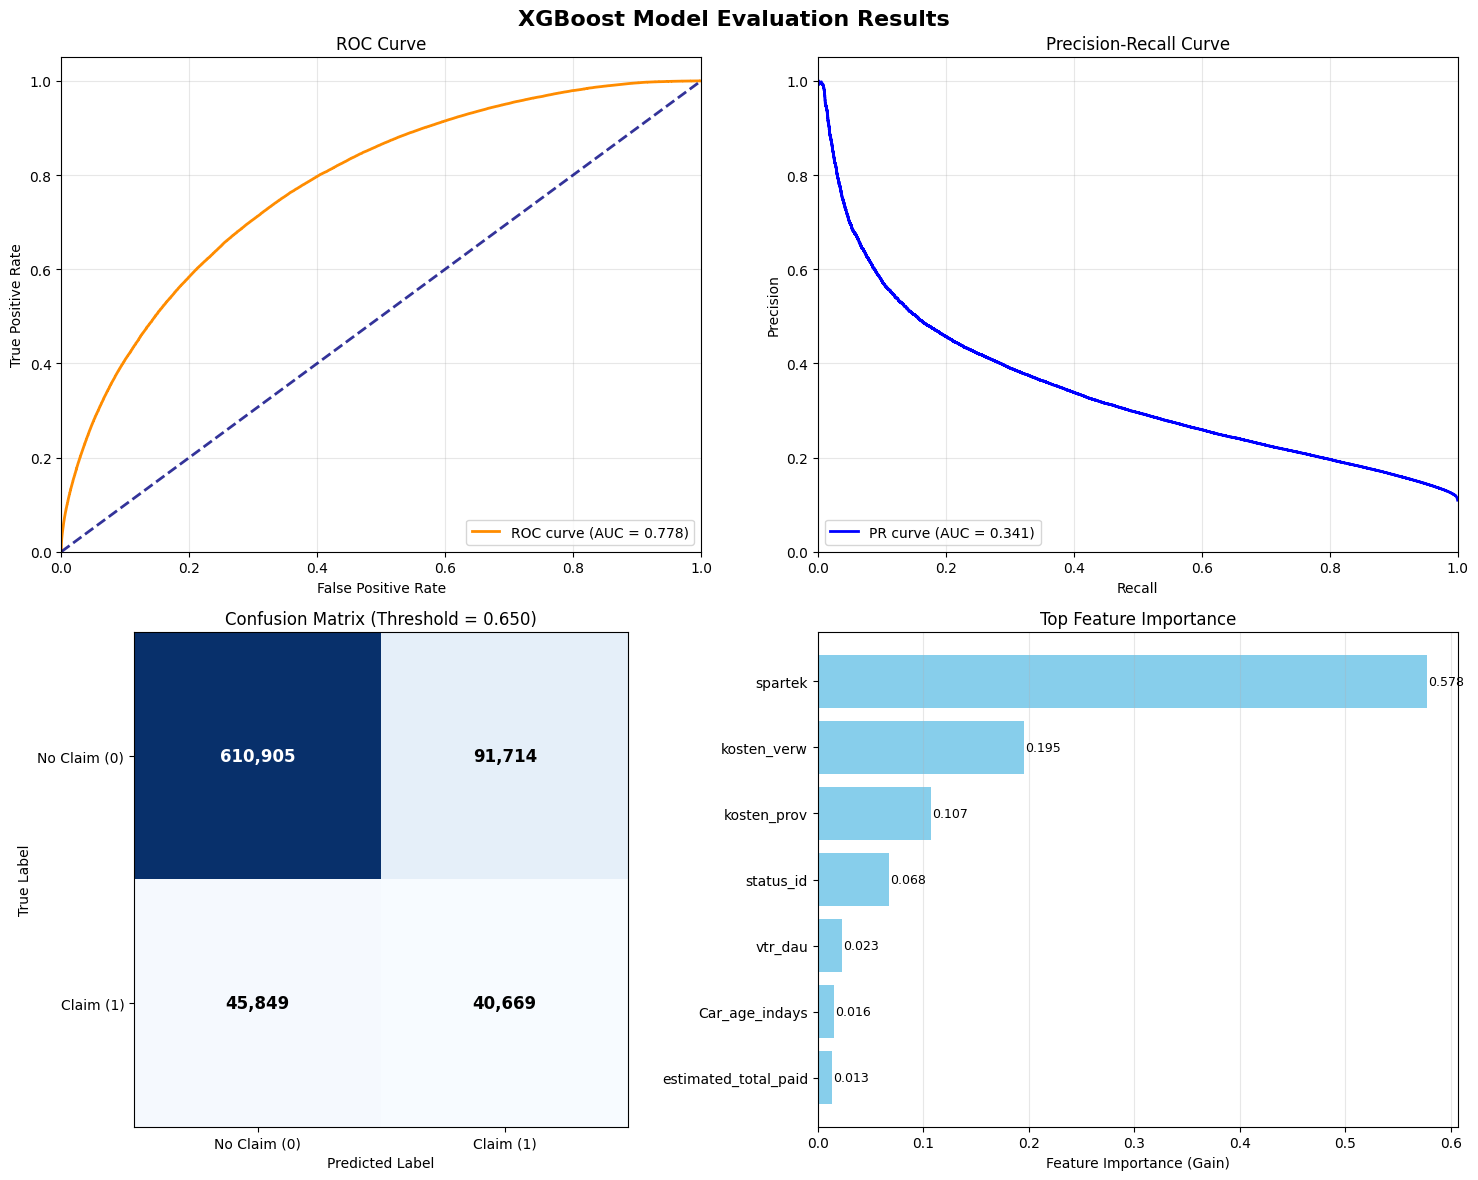


📋 FINAL RESULTS SUMMARY

🏆 Best Optuna Parameters:
  max_depth: 6
  learning_rate: 0.19476582436567746
  n_estimators: 670
  subsample: 0.9205612887066459
  colsample_bytree: 0.8722927226648618
  min_child_weight: 9
  gamma: 0.18045844252219764
  reg_alpha: 0.7259162525102504
  reg_lambda: 1.7508587374721494

📊 Model Performance:
  Validation PR AUC (Optuna): 0.3411
  Test ROC AUC: 0.7776
  Test PR AUC: 0.3406

🎯 Threshold Analysis:
  Best F1 threshold: 0.650
  Best F1 score: 0.3716

📈 Final Test Metrics (at optimal threshold 0.650):
  Accuracy: 0.8257
  Precision: 0.3072
  Recall: 0.4701
  F1: 0.3716
  ROC AUC: 0.7776
  PR AUC: 0.3406

💾 Saving Model
---------------
✅ Model saved as 'xgb_claim_model.json'

🎉 Pipeline completed successfully!


In [31]:
"""
Complete XGBoost Binary Classifier with Optuna Hyperparameter Tuning
Predicts 'claim' target using provided features with comprehensive evaluation.
"""

# Standard library imports
import warnings
warnings.filterwarnings('ignore')

# Core data science libraries
import pandas as pd
import numpy as np

# Scikit-learn imports
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, roc_curve, 
    precision_recall_curve, confusion_matrix
)

# XGBoost and Optuna
import xgboost as xgb
import optuna

# Plotting
import matplotlib.pyplot as plt

print("🚀 Starting XGBoost Binary Classification Pipeline")
print("="*60)

# ============================================================================
# 1. DATA PREPROCESSING
# ============================================================================

print("\n📊 Data Preprocessing")
print("-" * 30)

# Define features and target
features = ['vtr_dau','kosten_verw','kosten_prov','spartek',
           'status_id','Car_age_indays','estimated_total_paid']
target = 'claim'

# Check if df exists and has required columns
try:
    print(f"Original dataset shape: {df.shape}")
    print(f"Features available: {[col for col in features if col in df.columns]}")
    print(f"Target available: {target in df.columns}")
except NameError:
    print("ERROR: DataFrame 'df' not found in memory!")
    print("Please ensure the DataFrame 'df' exists before running this script.")
    exit(1)

# Extract features and target
X = df[features].copy()
y = df[target].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check for missing values
missing_counts = X.isnull().sum()
if missing_counts.sum() > 0:
    print(f"\nMissing values found:")
    print(missing_counts[missing_counts > 0])
    
    # Impute missing values with median
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(X), columns=features, index=X.index)
    print("✅ Missing values imputed with median")
else:
    print("✅ No missing values found")

# Check target distribution
target_counts = y.value_counts().sort_index()
print(f"\nTarget distribution:")
for val, count in target_counts.items():
    print(f"  Class {val}: {count:,} samples ({count/len(y)*100:.1f}%)")

# Calculate class imbalance ratio for XGBoost
neg_count = target_counts[0]
pos_count = target_counts[1]
scale_pos_weight = neg_count / pos_count
print(f"Scale pos weight (neg/pos): {scale_pos_weight:.3f}")

# ============================================================================
# 2. DATA SPLITTING
# ============================================================================

print("\n🔀 Data Splitting")
print("-" * 20)

# First split: train+valid (80%) and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Second split: train (60% of total) and valid (20% of total)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42  # 0.25 * 0.8 = 0.2
)

print(f"Train set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Valid set: {X_valid.shape[0]:,} samples ({X_valid.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:  {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Verify stratification
for split_name, y_split in [("Train", y_train), ("Valid", y_valid), ("Test", y_test)]:
    pos_rate = y_split.mean()
    print(f"{split_name} positive rate: {pos_rate:.3f}")

# ============================================================================
# 3. HYPERPARAMETER TUNING WITH OPTUNA
# ============================================================================

print("\n🎯 Hyperparameter Tuning with Optuna")
print("-" * 40)

def objective(trial):
    """Optuna objective function for hyperparameter optimization."""
    
    # Suggest hyperparameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'scale_pos_weight': scale_pos_weight,
        'random_state': 42,
        'verbosity': 0,
        
        # Tunable parameters
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1, 2)
    }
    
    # Train model with early stopping
    # Add early stopping to params for newer XGBoost versions
    params['early_stopping_rounds'] = 100
    model = xgb.XGBClassifier(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        verbose=False
    )
    
    # Predict probabilities on validation set
    y_valid_pred_proba = model.predict_proba(X_valid)[:, 1]
    
    # Calculate PR AUC (average precision)
    pr_auc = average_precision_score(y_valid, y_valid_pred_proba)
    
    return pr_auc

# Run Optuna optimization
print("Running Optuna optimization...")
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get best parameters
best_params = study.best_params.copy()
best_params.update({
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'scale_pos_weight': scale_pos_weight,
    'random_state': 42,
    'verbosity': 0
})

print(f"\n✅ Optuna optimization completed!")
print(f"Best PR AUC on validation: {study.best_value:.4f}")
print(f"Best parameters:")
for param, value in best_params.items():
    if param not in ['objective', 'eval_metric', 'scale_pos_weight', 'random_state', 'verbosity']:
        print(f"  {param}: {value}")

# ============================================================================
# 4. FINAL MODEL TRAINING
# ============================================================================

print("\n🏋️ Final Model Training")
print("-" * 25)

# Combine train and validation sets for final training
X_train_final = pd.concat([X_train, X_valid])
y_train_final = pd.concat([y_train, y_valid])

print(f"Final training set: {X_train_final.shape[0]:,} samples")

# Split the combined train+valid for early stopping
X_train_es, X_valid_es, y_train_es, y_valid_es = train_test_split(
    X_train_final, y_train_final, test_size=0.2, stratify=y_train_final, random_state=42
)

# Train final model with best parameters
best_params['early_stopping_rounds'] = 100
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(
    X_train_es, y_train_es,
    eval_set=[(X_valid_es, y_valid_es)],
    verbose=False
)

print(f"✅ Final model trained with {final_model.n_estimators} estimators")

# ============================================================================
# 5. TEST SET EVALUATION
# ============================================================================

print("\n📈 Test Set Evaluation")
print("-" * 25)

# Predictions on test set
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

# Calculate metrics at threshold 0.5
metrics_05 = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1': f1_score(y_test, y_test_pred),
    'ROC AUC': roc_auc_score(y_test, y_test_pred_proba),
    'PR AUC': average_precision_score(y_test, y_test_pred_proba)
}

print("Metrics at threshold 0.5:")
for metric, value in metrics_05.items():
    print(f"  {metric}: {value:.4f}")

# ============================================================================
# 6. THRESHOLD OPTIMIZATION
# ============================================================================

print("\n🎯 Threshold Optimization")
print("-" * 28)

# Search for best F1 threshold
thresholds = np.arange(0.1, 1.0, 0.01)
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_test_pred_proba > thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

# Find best threshold
best_thresh_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_thresh_idx]
best_f1 = f1_scores[best_thresh_idx]

# Calculate metrics at best threshold
y_test_pred_best = (y_test_pred_proba > best_threshold).astype(int)
best_metrics = {
    'Threshold': best_threshold,
    'Accuracy': accuracy_score(y_test, y_test_pred_best),
    'Precision': precision_score(y_test, y_test_pred_best),
    'Recall': recall_score(y_test, y_test_pred_best),
    'F1': f1_score(y_test, y_test_pred_best),
    'ROC AUC': roc_auc_score(y_test, y_test_pred_proba),
    'PR AUC': average_precision_score(y_test, y_test_pred_proba)
}

print(f"Best F1 threshold: {best_threshold:.3f}")
print("Metrics at best threshold:")
for metric, value in best_metrics.items():
    if metric != 'Threshold':
        print(f"  {metric}: {value:.4f}")

# ============================================================================
# 7. VISUALIZATIONS
# ============================================================================

print("\n📊 Creating Visualizations")
print("-" * 28)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('XGBoost Model Evaluation Results', fontsize=16, fontweight='bold')

# 1. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {metrics_05["ROC AUC"]:.3f})')
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.8)
axes[0, 0].set_xlim([0.0, 1.0])
axes[0, 0].set_ylim([0.0, 1.05])
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curve')
axes[0, 0].legend(loc="lower right")
axes[0, 0].grid(True, alpha=0.3)

# 2. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
axes[0, 1].plot(recall, precision, color='blue', lw=2,
                label=f'PR curve (AUC = {metrics_05["PR AUC"]:.3f})')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision-Recall Curve')
axes[0, 1].legend(loc="lower left")
axes[0, 1].grid(True, alpha=0.3)

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_best)
im = axes[1, 0].imshow(cm, interpolation='nearest', cmap='Blues')
axes[1, 0].set_title(f'Confusion Matrix (Threshold = {best_threshold:.3f})')
tick_marks = np.arange(2)
axes[1, 0].set_xticks(tick_marks)
axes[1, 0].set_yticks(tick_marks)
axes[1, 0].set_xticklabels(['No Claim (0)', 'Claim (1)'])
axes[1, 0].set_yticklabels(['No Claim (0)', 'Claim (1)'])
axes[1, 0].set_ylabel('True Label')
axes[1, 0].set_xlabel('Predicted Label')

# Add text annotations to confusion matrix
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        axes[1, 0].text(j, i, f'{cm[i, j]:,}',
                       ha="center", va="center",
                       color="white" if cm[i, j] > thresh else "black",
                       fontsize=12, fontweight='bold')

# 4. Feature Importance
feature_importance = final_model.feature_importances_
feature_names = features
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=True)

# Get top 20 (or all if less than 20)
top_features = importance_df.tail(min(20, len(importance_df)))

axes[1, 1].barh(range(len(top_features)), top_features['importance'], color='skyblue')
axes[1, 1].set_yticks(range(len(top_features)))
axes[1, 1].set_yticklabels(top_features['feature'])
axes[1, 1].set_xlabel('Feature Importance (Gain)')
axes[1, 1].set_title('Top Feature Importance')
axes[1, 1].grid(True, axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(top_features['importance']):
    axes[1, 1].text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================================
# 8. RESULTS SUMMARY
# ============================================================================

print("\n" + "="*60)
print("📋 FINAL RESULTS SUMMARY")
print("="*60)

print(f"\n🏆 Best Optuna Parameters:")
for param, value in study.best_params.items():
    print(f"  {param}: {value}")

print(f"\n📊 Model Performance:")
print(f"  Validation PR AUC (Optuna): {study.best_value:.4f}")
print(f"  Test ROC AUC: {metrics_05['ROC AUC']:.4f}")
print(f"  Test PR AUC: {metrics_05['PR AUC']:.4f}")

print(f"\n🎯 Threshold Analysis:")
print(f"  Best F1 threshold: {best_threshold:.3f}")
print(f"  Best F1 score: {best_f1:.4f}")

print(f"\n📈 Final Test Metrics (at optimal threshold {best_threshold:.3f}):")
for metric, value in best_metrics.items():
    if metric != 'Threshold':
        print(f"  {metric}: {value:.4f}")

# ============================================================================
# 9. MODEL SAVING
# ============================================================================

print(f"\n💾 Saving Model")
print("-" * 15)

# Save the final model
final_model.save_model('xgb_claim_model.json')
print("✅ Model saved as 'xgb_claim_model.json'")

print(f"\n🎉 Pipeline completed successfully!")
print("="*60)